# Evaluation Project-2

# Avacado Project

# TASK 1- Finding Average Price

Here we are first trying to predict Avg price of avocados that is task 1 then we perform task 2 where we need to predict the region of avocados

In [1]:
# importing all libraries
import pandas as pd
import numpy as np
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor 


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Getting the csv file extracted from zip file
dfr = pd.read_csv('avocado.csv')
dfr

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  12/27/2015          1.33      64236.62  1036.74   54454.85   
1               1  12/20/2015          1.35      54876.98   674.28   44638.81   
2               2  12/13/2015          0.93     118220.22   794.70  109149.67   
3               3   12/6/2015          1.08      78992.15  1132.00   71976.41   
4               4  11/29/2015          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7    2/4/2018          1.63      17074.83  2046.96    1529.20   
18245           8   1/28/2018          1.71      13888.04  1191.70    3431.50   
18246           9   1/21/2018          1.87      13766.76  1191.92    2452.79   
18247          10   1/14/2018          1.93      16205.22  1527.63    2981.04   
18248          11    1/7/2018          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [3]:
dfc = dfr.copy()   # for doing classification case study where region is label

In [4]:
dfc

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  12/27/2015          1.33      64236.62  1036.74   54454.85   
1               1  12/20/2015          1.35      54876.98   674.28   44638.81   
2               2  12/13/2015          0.93     118220.22   794.70  109149.67   
3               3   12/6/2015          1.08      78992.15  1132.00   71976.41   
4               4  11/29/2015          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7    2/4/2018          1.63      17074.83  2046.96    1529.20   
18245           8   1/28/2018          1.71      13888.04  1191.70    3431.50   
18246           9   1/21/2018          1.87      13766.76  1191.92    2452.79   
18247          10   1/14/2018          1.93      16205.22  1527.63    2981.04   
18248          11    1/7/2018          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

From above data we can see that unamed column is not needed.And we have 18249 rows and 14 columns

As we are going to predict Average Price of avacados first then this problem becomes a regression problem and average prive is label and target variable.

We will need to convert object data types into numerical


In [5]:
dfr.drop('Unnamed: 0', inplace= True,axis=1)

In [6]:
dfr.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  12/27/2015          1.33      64236.62  1036.74   54454.85   48.16   
1  12/20/2015          1.35      54876.98   674.28   44638.81   58.33   
2  12/13/2015          0.93     118220.22   794.70  109149.67  130.50   
3   12/6/2015          1.08      78992.15  1132.00   71976.41   72.58   
4  11/29/2015          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

# EDA

In [7]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


we have 3 columns of object datatypes, 9 of float datatypes and 1 of integer datatype. 

In [8]:
dfr.shape

(18249, 13)

After removing unnamed column we have 18249 rows and 13 columns

In [9]:
dfr.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

# Checking null values:

In [10]:
dfr.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

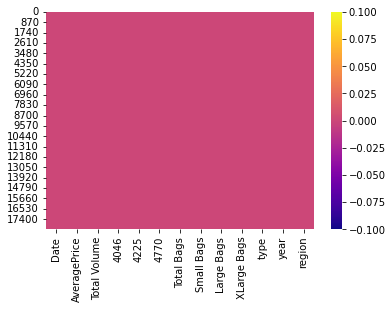

In [11]:
sns.heatmap(dfr.isnull(),cmap='plasma')

We can see from visually and from table that there are no null values in our data

# Checking duplicates:

In [12]:
dfr.duplicated().sum()

0

No duplicates values are present in our data

In [13]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Descriptive Statistics:

In [14]:
dfr.describe().T

count           mean           std      min       25%  \
AveragePrice  18249.0       1.405978  4.026766e-01     0.44      1.10   
Total Volume  18249.0  850644.013009  3.453545e+06    84.56  10838.58   
4046          18249.0  293008.424531  1.264989e+06     0.00    854.07   
4225          18249.0  295154.568356  1.204120e+06     0.00   3008.78   
4770          18249.0   22839.735993  1.074641e+05     0.00      0.00   
Total Bags    18249.0  239639.202060  9.862424e+05     0.00   5088.64   
Small Bags    18249.0  182194.686696  7.461785e+05     0.00   2849.42   
Large Bags    18249.0   54338.088145  2.439660e+05     0.00    127.47   
XLarge Bags   18249.0    3106.426507  1.769289e+04     0.00      0.00   
year          18249.0    2016.147899  9.399385e-01  2015.00   2015.00   

                    50%        75%          max  
AveragePrice       1.37       1.66         3.25  
Total Volume  107376.76  432962.29  62505646.52  
4046            8645.30  111020.20  22743616.17  
4225           29061.02  150206.86  20470572.61  
4770             184.99    6243.42   2546439.11  
Total Bags     39743.83  110783.37  19373134.37  
Small Bags     26362.82   83337.67  13384586.80  
Large Bags      2647.71   22029.25   5719096.61  
XLarge Bags        0.00     132.50    551693.65  
year            2016.00    2017.00      2018.00

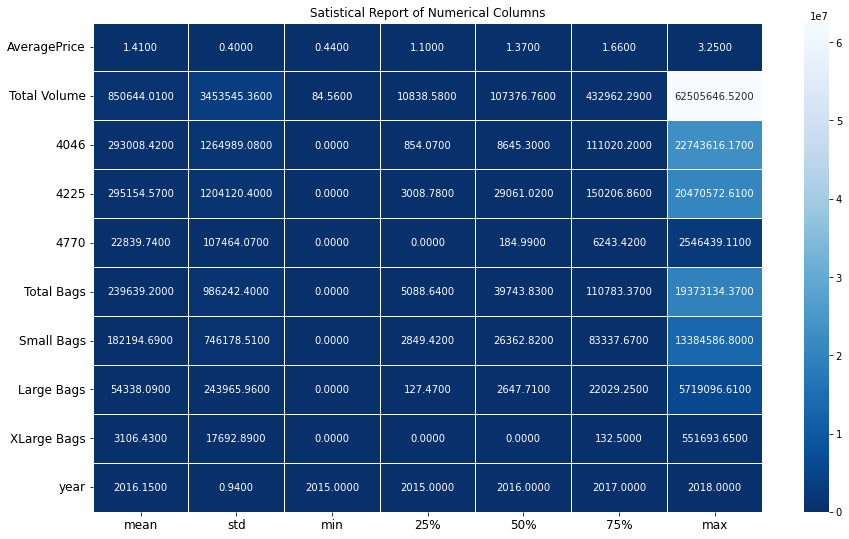

In [15]:
# visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (15,9))
sns.heatmap(round(dfr.describe()[1:].transpose(),2), linewidth = 0.5, annot= True, fmt = ".4f", cmap="Blues_r")
plt.title("Satistical Report of Numerical Columns")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

We can see descriptive statistics of numerical columns in our data

Count of all columns is same meaning no null values.

In every column mean is greater than median this means all numerical columns are right skewed.

High difference in 75 % and max value shows presence of outliers

Some min values are zero in 4046, 4225, 4770, Total Bags, Small Bags, Large Bags and XLarge Bags but they seem to be valid  since there is a possibility of presence of a legitimate zero value.

# Checking unique values and value counts

In [16]:
dfr.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [17]:
# lets check value counts of columns having less unique values
col=['type','year','region']
for i in col:
    print(i)
    print(dfr[i].value_counts())
    print('\n')

type
conventional    9126
organic         9123
Name: type, dtype: int64


year
2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    33

In [18]:
# Lets handle the date column as it may hinder in our future pre-processing 

dfr['Month'], dfr['Day'], dfr['Year'] = dfr['Date'].str.split('/').str
dfr.drop(columns=['Date','year'], inplace=True)
dfr.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  region Month Day  Year  
0     8603.62       93.25          0.0  conventional  Albany    12  27  2015  
1     9408.07       97.49          0.0  conventional  Albany    12  20  2015  
2     8042.21      103.14          0.0  conventional  Albany    12  13  2015  
3     5677.40      133.76          0.0  conventional  Albany    12   6  2015  
4     5986.26      197.69          0.0  conventional  Albany    11  29  2015

the inbuilt 'year' column in data told us the year in which the observation was taken and the "Year" created above tell us the year of sales

In [19]:
dfr['Year']=dfr['Year'].astype(int)
dfr['Month']=dfr['Month'].astype(int)
dfr['Date']=dfr['Day'].astype(int)
dfr.drop(columns=['Day'], inplace=True)
dfr.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  region  Month  Year  \
0     8603.62       93.25          0.0  conventional  Albany     12  2015   
1     9408.07       97.49          0.0  conventional  Albany     12  2015   
2     8042.21      103.14          0.0  conventional  Albany     12  2015   
3     5677.40      133.76          0.0  conventional  Albany     12  2015   
4     5986.26      197.69          0.0  conventional  Albany     11  2015   

   Date  
0    27  
1    20  
2    13  
3     6  
4    29

# Visualizations

Univariate Analysis

• Count Plot

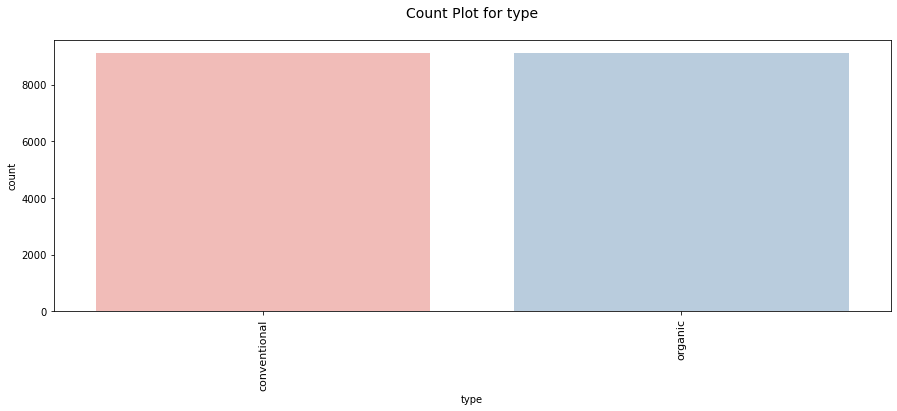

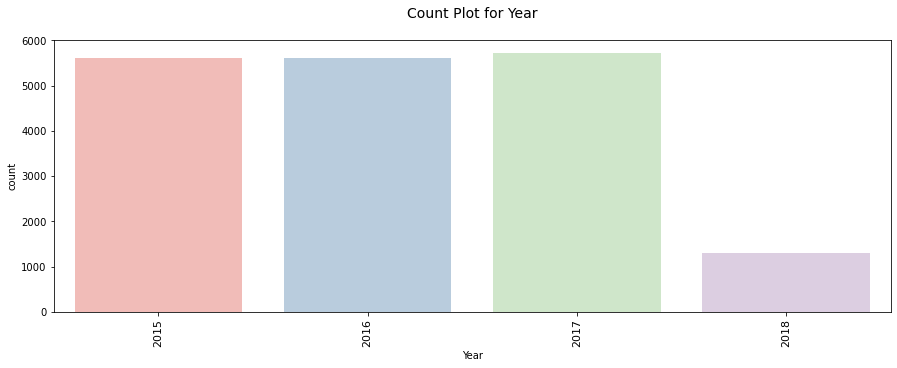

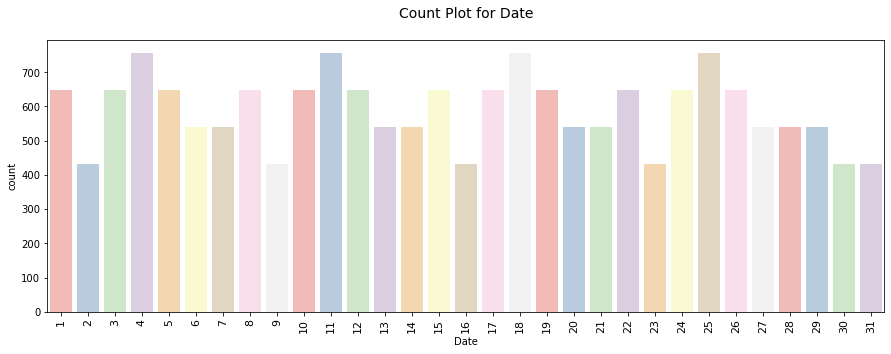

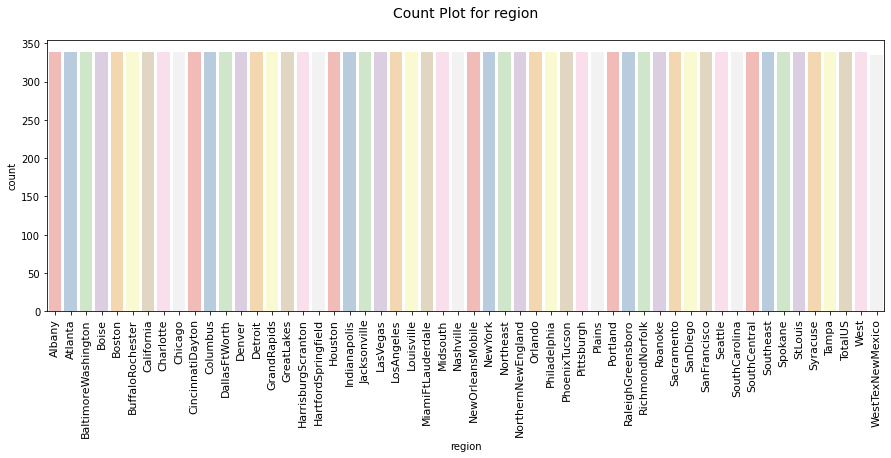

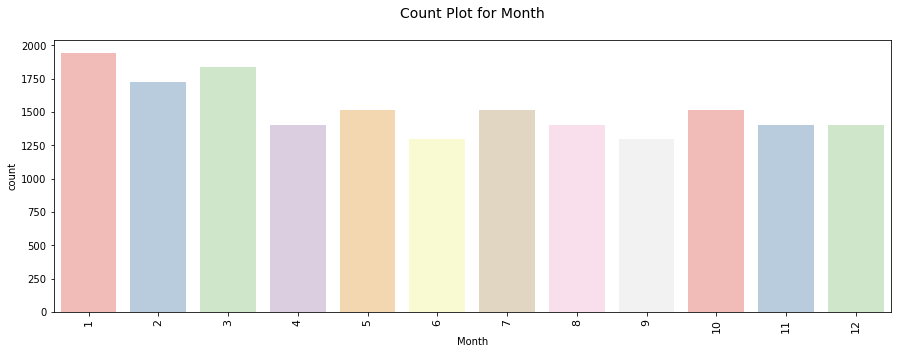

In [20]:
col=['type','Year','Date','region','Month',]

for i in col:
    
    plt.figure(figsize=(15,5))
    sns.countplot(dfr[i], palette= 'Pastel1')

    plt.xticks(rotation=90,fontsize =11)
    plt.title(f"Count Plot for {i}\n", fontsize =14)

In [21]:
dfr.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region', 'Month',
       'Year', 'Date'],
      dtype='object')

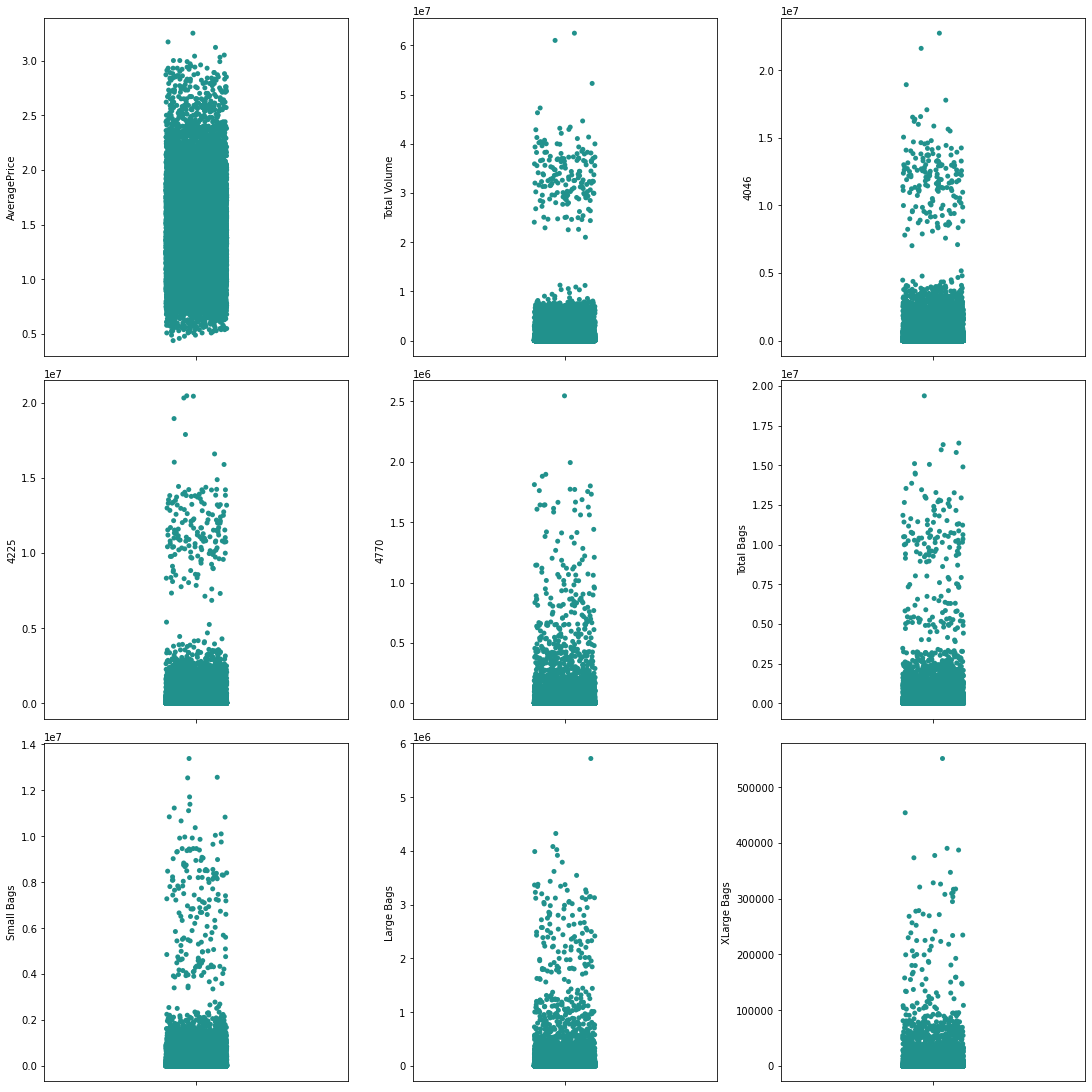

In [22]:
s = ['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(15,15))
index = 0

ax = ax.flatten()
for col in s:
    sns.stripplot(y=col, data=dfr, ax=ax[index], palette="viridis")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

Total Volume 4046,4225, 4770,Total Bags, Small  Bags, Large bags, Xlarge bags have points further away from the general accumulation indicating presence of outliers

• Bivariate analysis

<Figure size 1080x720 with 0 Axes>

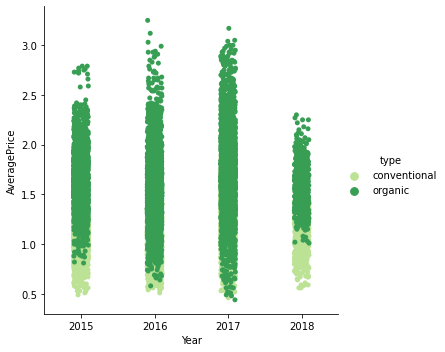

In [23]:
plt.figure(figsize=(15,10))
sns.catplot(x="Year", y="AveragePrice", hue="type", data=dfr, palette="YlGn")
plt.show()

In the above categorical plot we see the Average Price information as per year and how conventional and organic types were sold. We can see that organic types are always priced higher than the conventional one's since organic farming requires lots of efforts, time and method to grow avacados that yield lesser when compared to conventional ways by using chemical fertilizers.

<Figure size 1080x720 with 0 Axes>

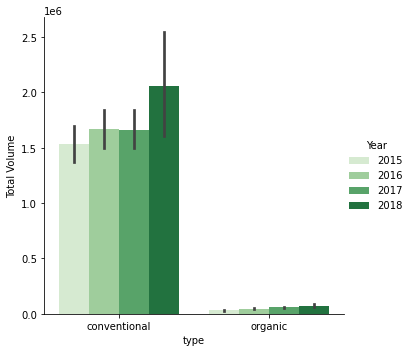

In [24]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Volume", hue="Year", data=dfr, kind="bar", palette="Greens")
plt.show()

we can see that conventional type is always sold more in all years

<Figure size 1080x720 with 0 Axes>

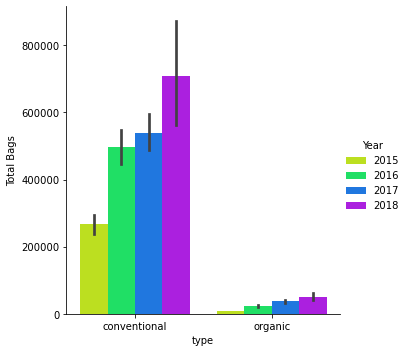

In [25]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="Year", data=dfr, kind="bar", palette="hsv")
plt.show()

it is obvious that more the sales more will be the bags ..so there are more bags of conventional

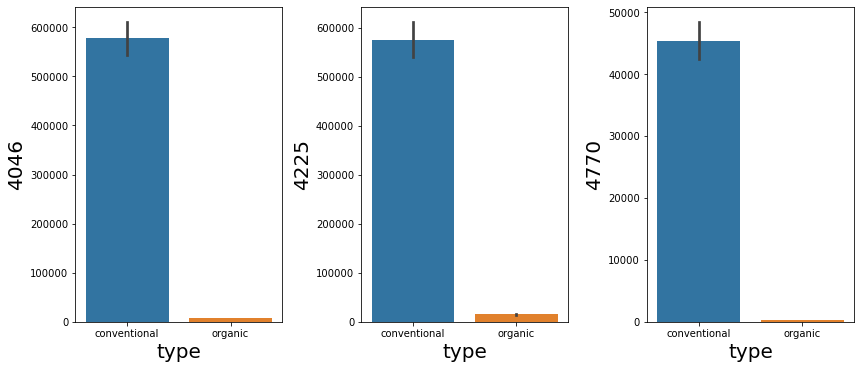

In [26]:
plt.figure(figsize=(20,25),facecolor='white')
num=1
c = dfr[['4046','4225','4770']]
d = dfr['type']
for col in c:
    if num<=23:
        plt.subplot(5,5,num)
        sns.barplot(d,c[col])
        plt.xlabel('type',fontsize=20)
        plt.ylabel(col,fontsize=20)
    num+=1
plt.tight_layout()

production of conventional type outnumbers that of organic type in the cases of 4046,4225 and 4770, which may also be a contributing factor to the higher average price of organic type

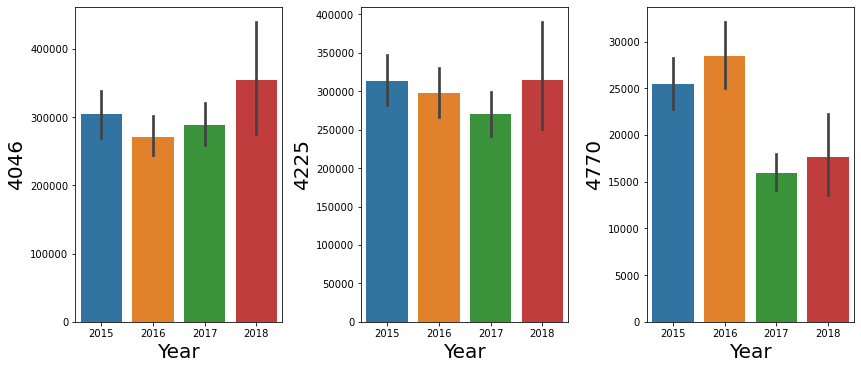

In [27]:
plt.figure(figsize=(20,25),facecolor='white')
num=1
c= dfr[['4046','4225','4770']]
d = dfr['Year']
for col in c:
    if num<=23:
        plt.subplot(5,5,num)
        sns.barplot(d,c[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    num+=1
plt.tight_layout()

Production of PLU 4046 has grown over the 4 years and is greater than the production of PLU 4225 and PLU 4770, which is least produced

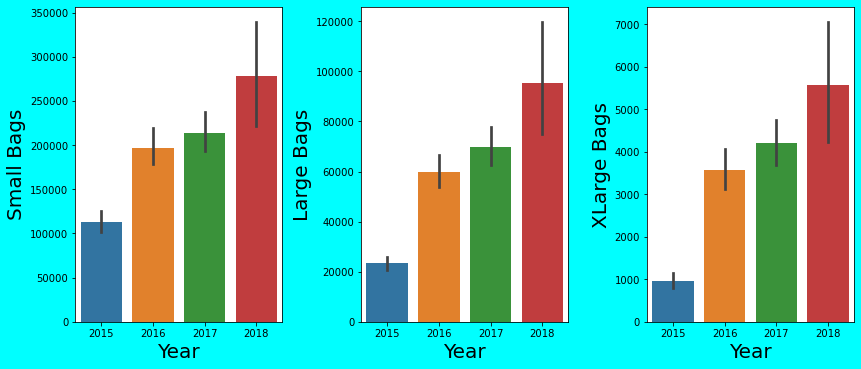

In [28]:
plt.figure(figsize=(20,25),facecolor='cyan')
num=1
c= dfr[['Small Bags','Large Bags','XLarge Bags']]
d = dfr['Year']
for col in c:
    if num<=23:
        plt.subplot(5,5,num)
        sns.barplot(d,c[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    num+=1
plt.tight_layout()

here we can plot of bags year wise and it is shown that small bags are increasing yearly similar to other two bags also but the production of small bags is more followed by large bags followed by Xlarge bags

Text(0, 0.5, '4046')

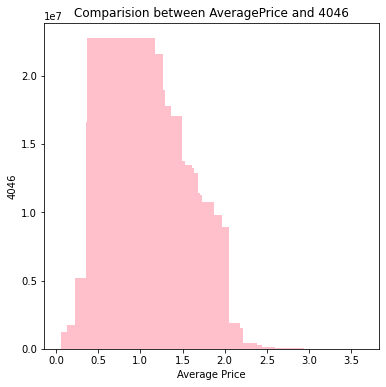

In [29]:
plt.figure(figsize=[6,6])
plt.title('Comparision between AveragePrice and 4046')
plt.bar('AveragePrice','4046',data=dfr,color='pink')
plt.xlabel('Average Price')
plt.ylabel('4046')

avg price of PLU 4046 lies between range 0.5 to 2.0

Text(0, 0.5, '4225')

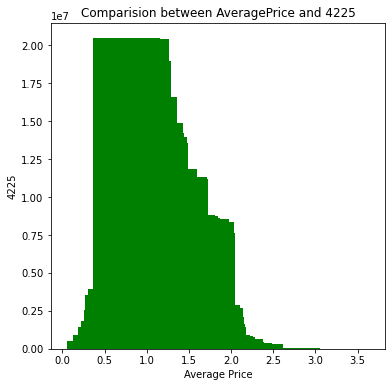

In [30]:
plt.figure(figsize=[6,6])
plt.title('Comparision between AveragePrice and 4225')
plt.bar('AveragePrice','4225',data=dfr,color='green')
plt.xlabel('Average Price')
plt.ylabel('4225')

Here for PLU  4225 avg price ranges from 0.4 - 2.0

Text(0, 0.5, '4770')

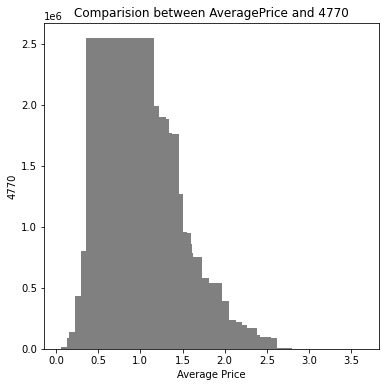

In [31]:
plt.figure(figsize=[6,6])
plt.title('Comparision between AveragePrice and 4770')
plt.bar('AveragePrice','4770',data=dfr,color='grey')
plt.xlabel('Average Price')
plt.ylabel('4770')

Here for PLU  4770 avg price ranges from 0.3 - 1.4

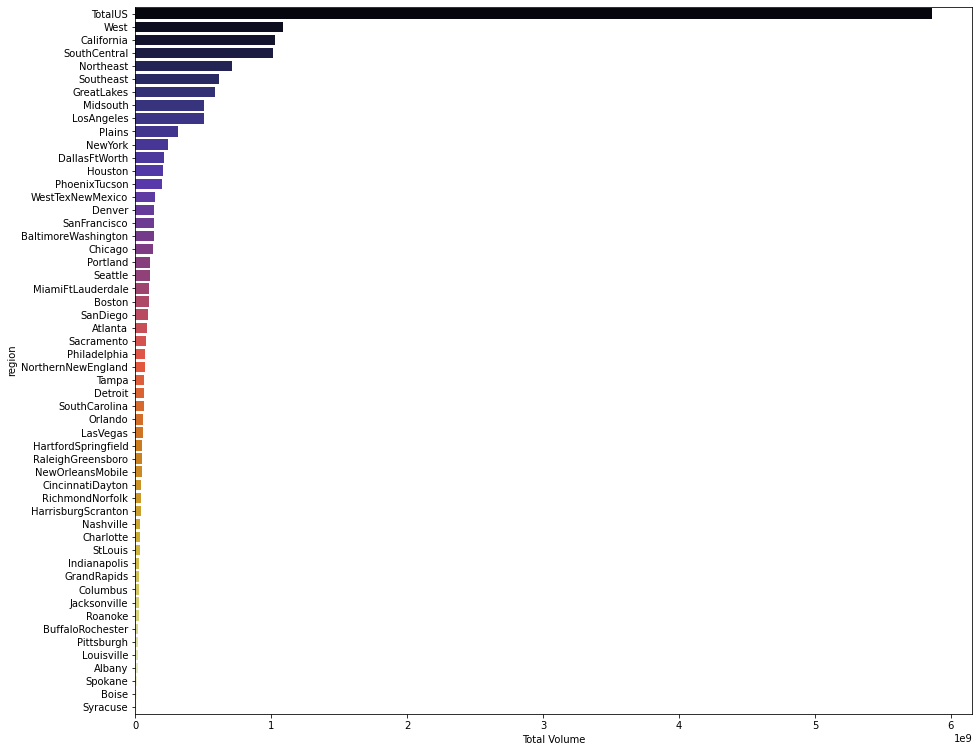

In [32]:
region = dfr.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=dfr, palette="CMRmap")
plt.show()

In the above bar plot we can see a sorted number of Total Volume of avacados sold from each and every region. 
And we can see that more avocados are sold in west, california,  South Central, North East, South East, Great Lakes, Mid South, Los Angeles, Plains, New York and so forth.

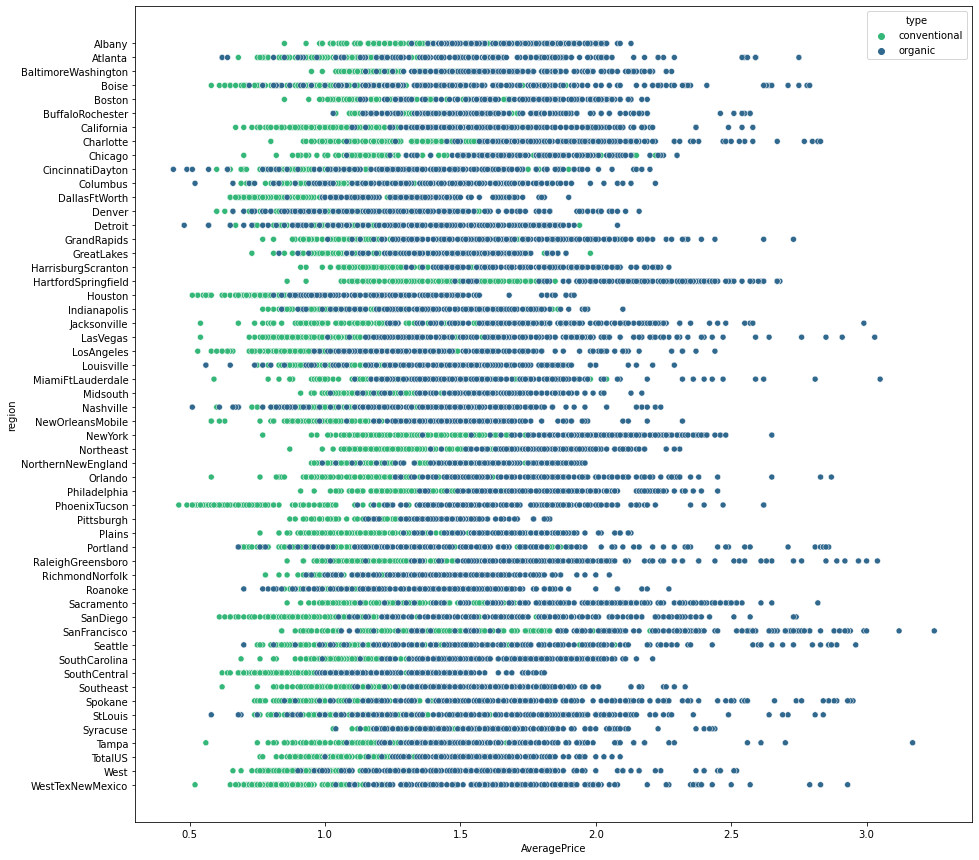

In [33]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=dfr, palette="viridis_r")
plt.show()

region wise plot of avg price of both conventional and organic avocados can be seen above
Also we can see that organic avocados rate are way higher than conventional one

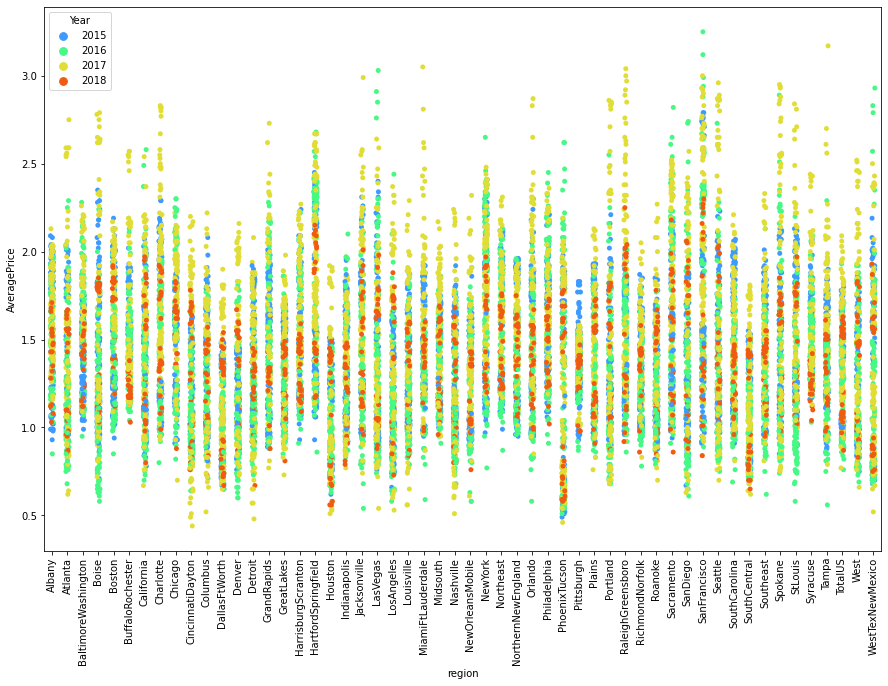

In [34]:
plt.figure(figsize=(15,10))
sns.stripplot(x='region', y='AveragePrice', hue="Year", data=dfr, palette="turbo")
plt.xticks(rotation=90)
plt.show()

Here we can see region wise yearly average price of avocados
and we can see that in years 2016 and 2017 the average prices were way higher than in the years 2015 and 2018.

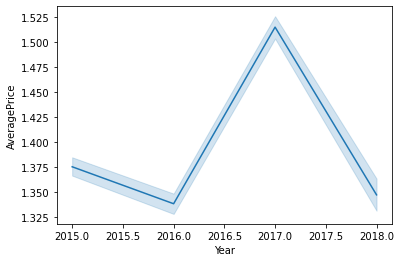

In [35]:
sns.lineplot(x="Year", y="AveragePrice", data=dfr)
plt.show()

Here we can see from above graph that avg price of avocados has decreased over the years taking peak in year 2017

• Multivariate Analysis

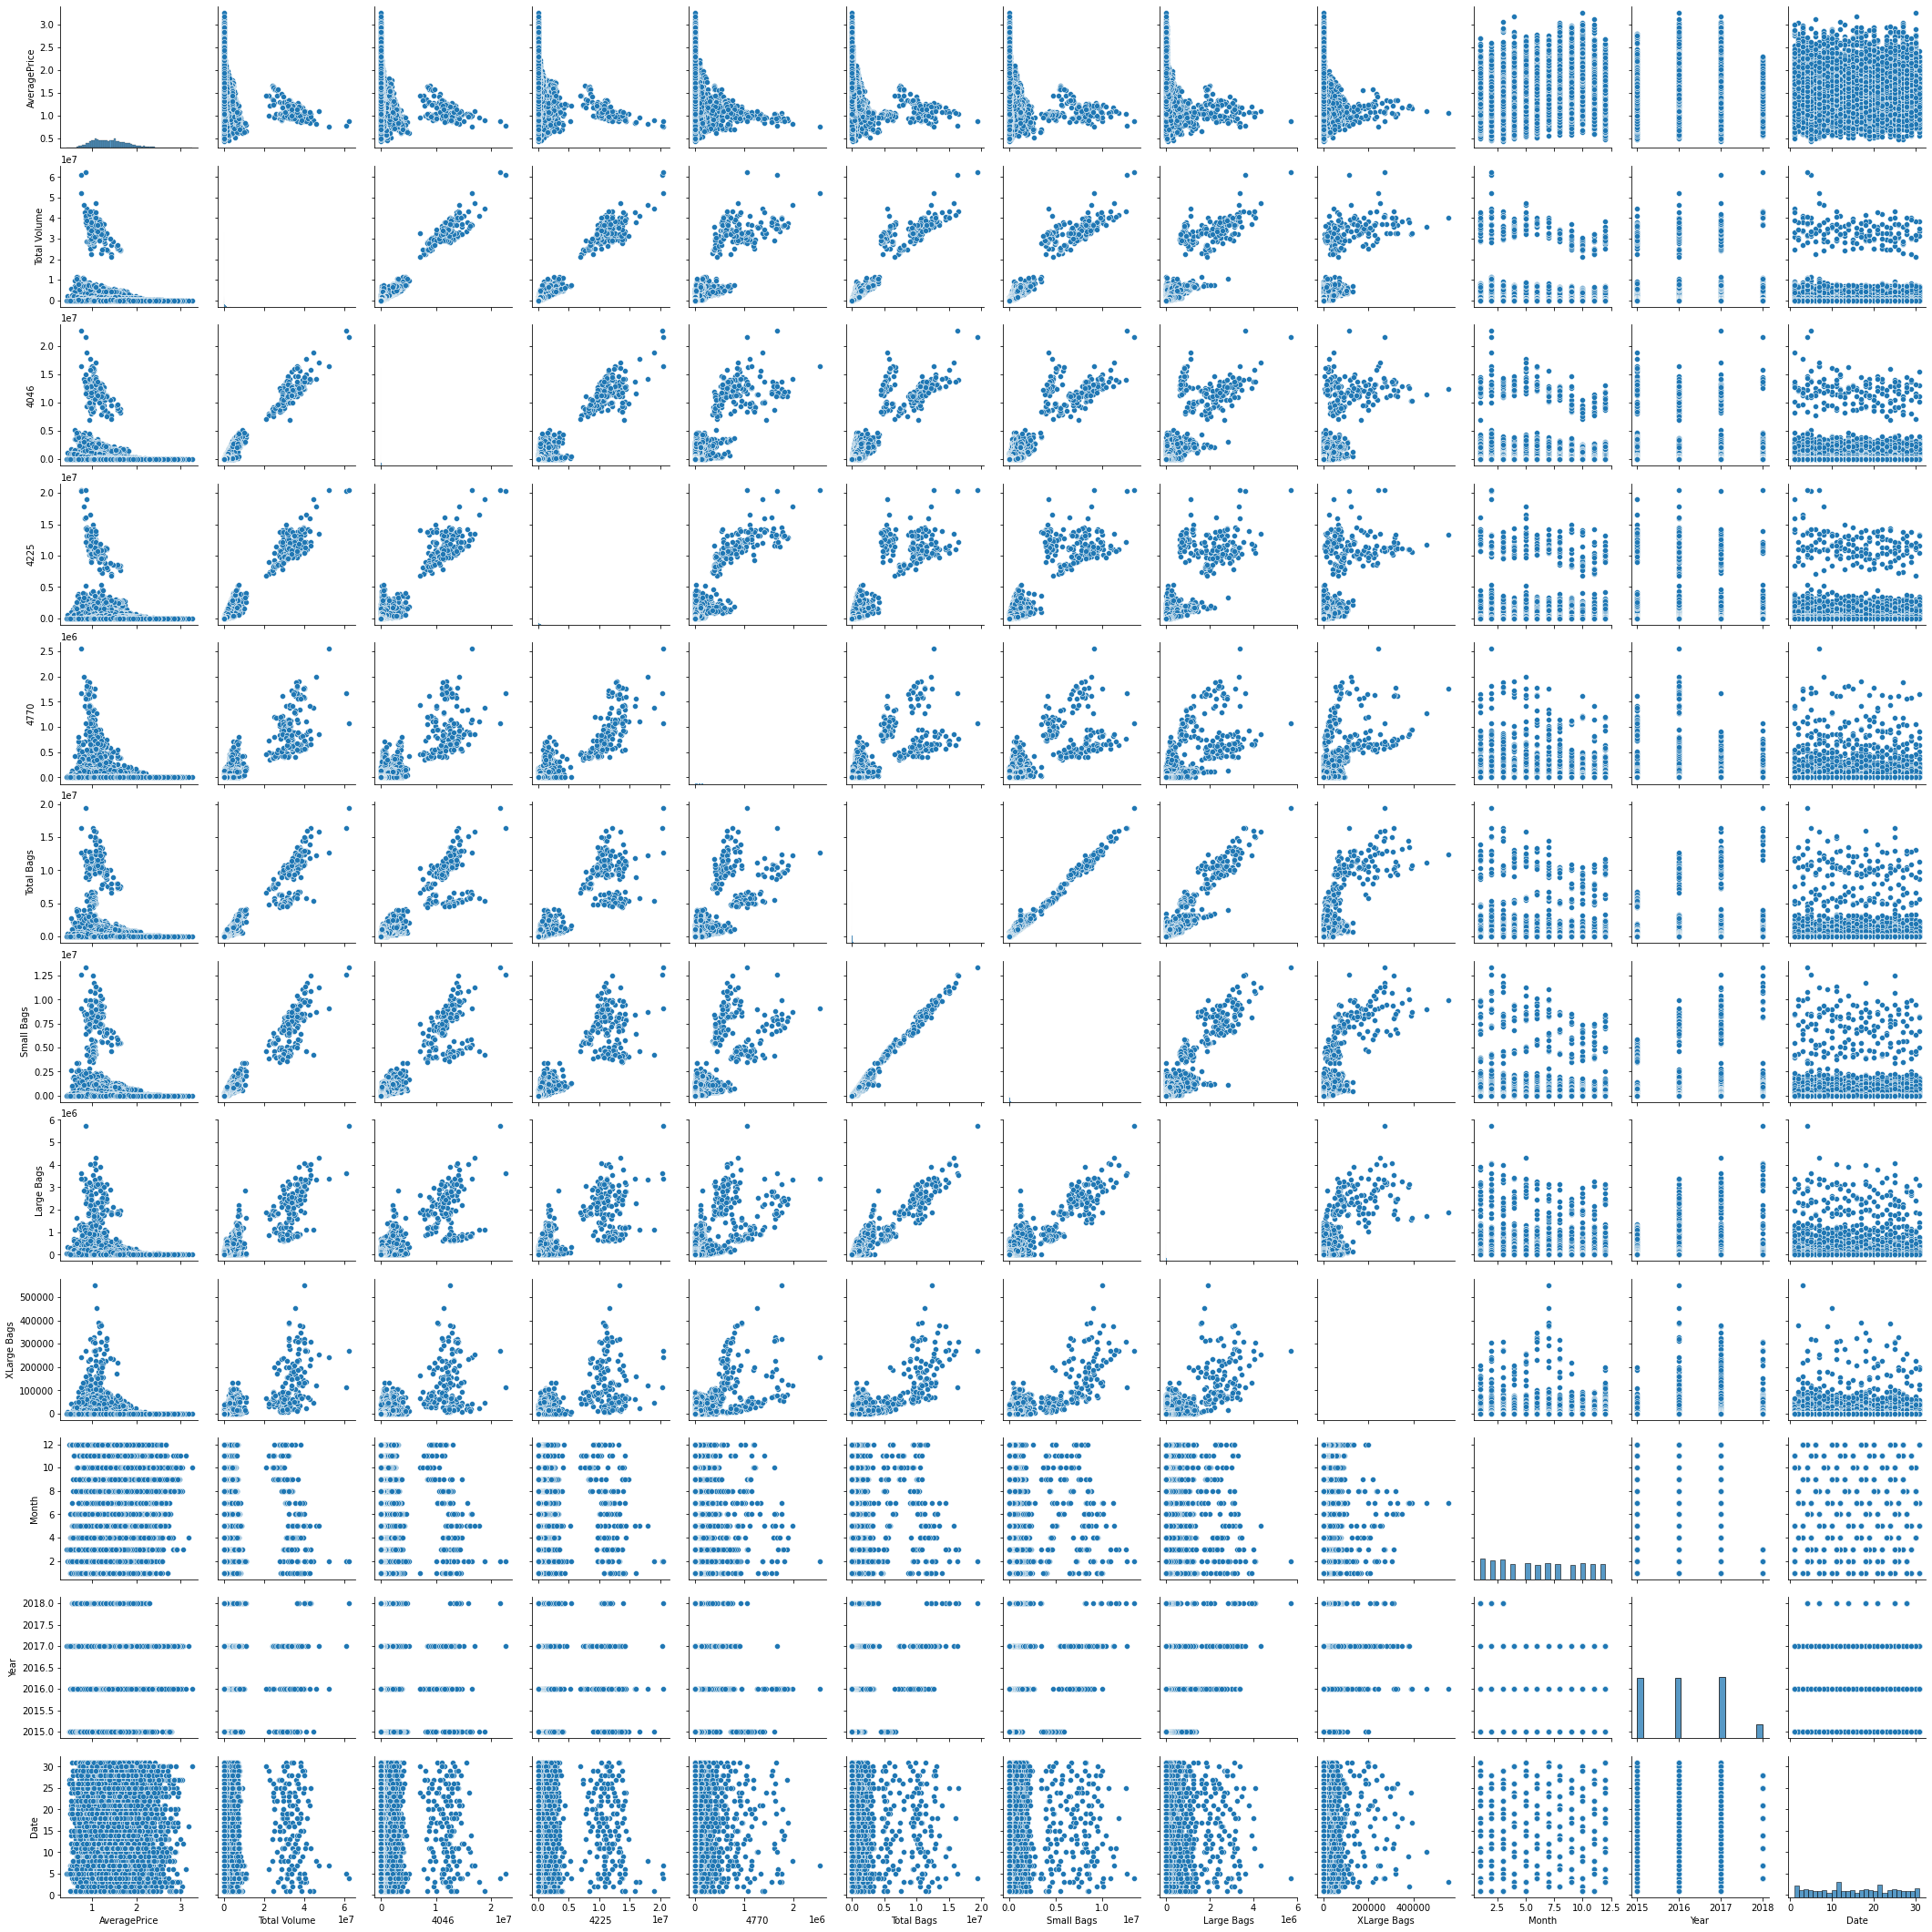

In [36]:
sns.pairplot(dfr)

Here from pairplot we can see relation of all feature columns with our target variable although it is very small we can see some clearly

We see that small bags and total bags have positive linear correlation
similarly total volume and 4046 & 4225 have positive and linear correlation

# Checking Correlation

In [37]:
dfr.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
Month             0.162409     -0.024689 -0.025803 -0.022108 -0.033424   
Year              0.093197      0.017193  0.003353 -0.009559 -0.036531   
Date              0.027386     -0.009747 -0.010159 -0.012393 -0.009009   

              Total Bags  Small Bags  Large Bags  XLarge Bags     Month  \
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.162409   
Total Volume    0.963047    0.967238    0.880640     0.747157 -0.024689   
4046            0.920057    0.925280    0.838645     0.699377 -0.025803   
4225            0.905787    0.916031    0.810015     0.688809 -0.022108   
4770            0.792314    0.802733    0.698471     0.679861 -0.033424   
Total Bags      1.000000    0.994335    0.943009     0.804233 -0.022724   
Small Bags      0.994335    1.000000    0.902589     0.806845 -0.023126   
Large Bags      0.943009    0.902589    1.000000     0.710858 -0.020187   
XLarge Bags     0.804233    0.806845    0.710858     1.000000 -0.012969   
Month          -0.022724   -0.023126   -0.020187    -0.012969  1.000000   
Year            0.071552    0.063915    0.087891     0.081033 -0.177050   
Date           -0.004988   -0.003870   -0.008352     0.000319  0.010621   

                  Year      Date  
AveragePrice  0.093197  0.027386  
Total Volume  0.017193 -0.009747  
4046          0.003353 -0.010159  
4225         -0.009559 -0.012393  
4770         -0.036531 -0.009009  
Total Bags    0.071552 -0.004988  
Small Bags    0.063915 -0.003870  
Large Bags    0.087891 -0.008352  
XLarge Bags   0.081033  0.000319  
Month        -0.177050  0.010621  
Year          1.000000  0.004475  
Date          0.004475  1.000000

<AxesSubplot:>

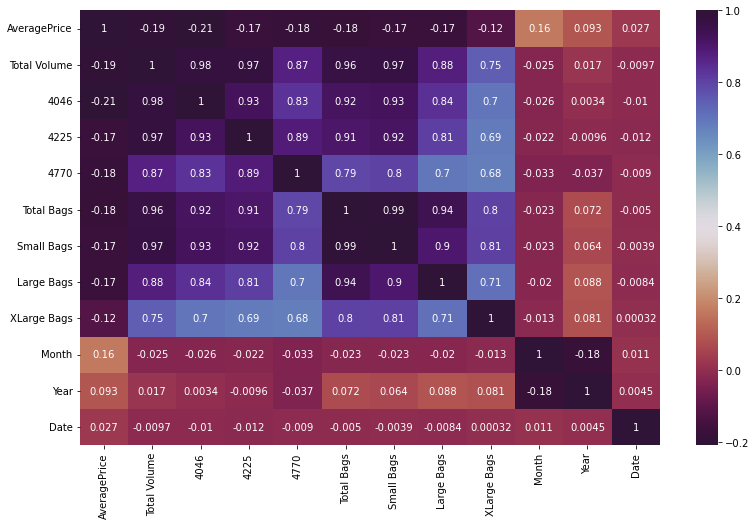

In [38]:
plt.figure(figsize=(13,8))
sns.heatmap(dfr.corr(), annot=True, cmap= 'twilight_shifted_r')

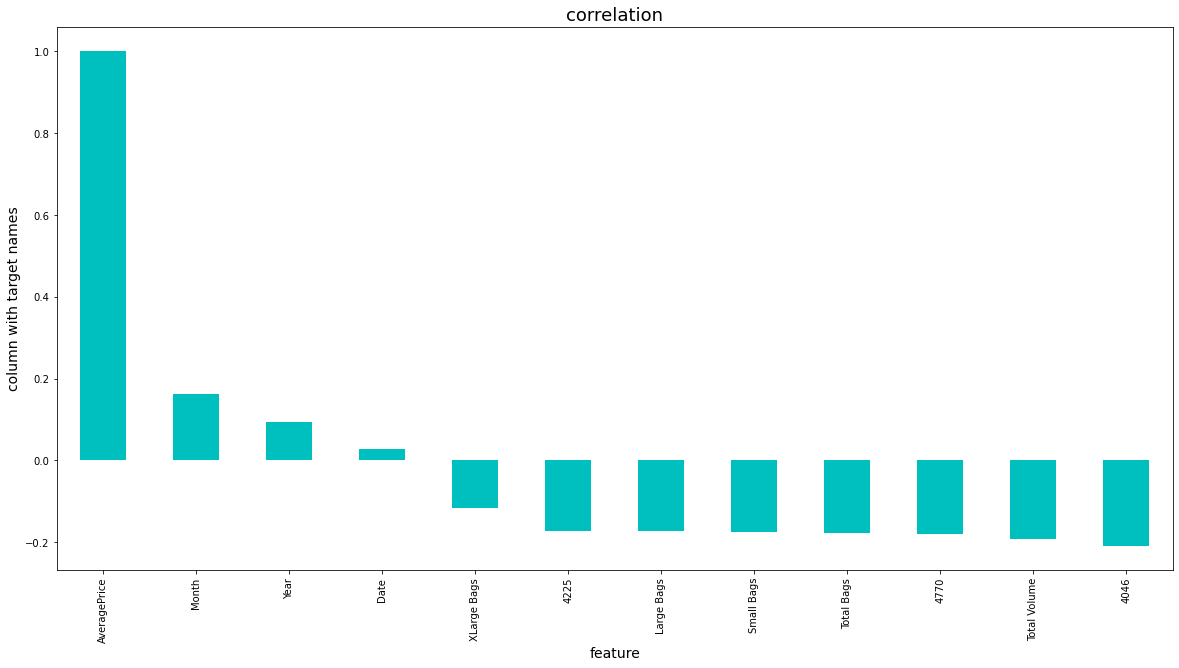

In [39]:
plt.figure(figsize=(20,10))
dfr.corr()['AveragePrice'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

From above we can see almost every feature is negatively correlated and also has higher correlation than positively correlated features


# Encoding

In [40]:
# lets convert our categorical columns to interger ones for further pre processing using label encode

le = LabelEncoder()
dfr['region']= le.fit_transform(dfr['region'])
dfr['type']= le.fit_transform(dfr['type'])

dfr.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  region  Month  Year  Date  
0     8603.62       93.25          0.0     0       0     12  2015    27  
1     9408.07       97.49          0.0     0       0     12  2015    20  
2     8042.21      103.14          0.0     0       0     12  2015    13  
3     5677.40      133.76          0.0     0       0     12  2015     6  
4     5986.26      197.69          0.0     0       0     11  2015    29

In [41]:
dfr.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
region            int32
Month             int32
Year              int32
Date              int32
dtype: object

Hence we have converted our boject datatype columns into numerical.

# Checking and removing Outliers:

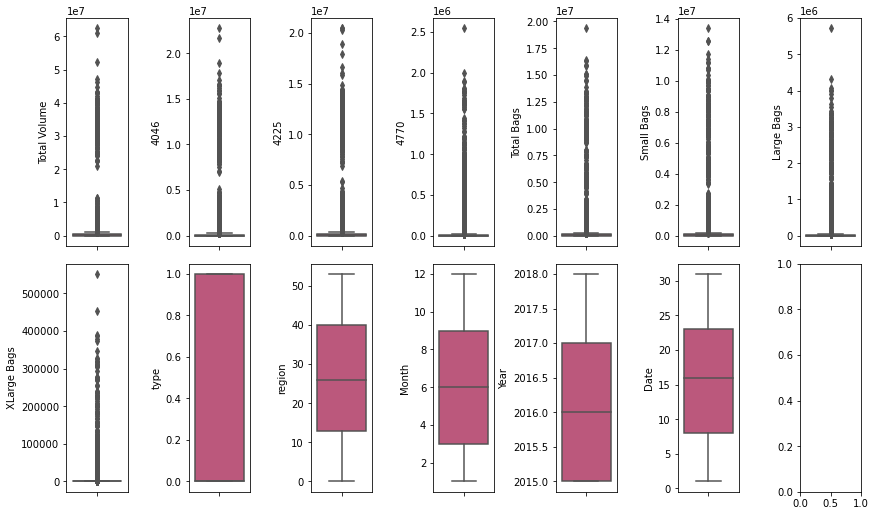

In [42]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(12,7))
index = 0
features = dfr.drop("AveragePrice", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=dfr, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

Here we can see outliers present in 4046, "4225", "4770", "Small Bags", "Large Bags","XLarge Bags",'Total volumne','total Bags'

In [43]:
#using Zscore to remove outliers

z = np.array(abs(zscore(dfr)))
threshold = 3
print(np.where(z>3))
dfr_new=dfr[(z<3).all(axis=1)]
dfr_new.head()

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  region  Month  Year  Date  
0     8603.62       93.25          0.0     0       0     12  2015    27  
1     9408.07       97.49          0.0     0       0     12  2015    20  
2     8042.21      103.14          0.0     0       0     12  2015    13  
3     5677.40      133.76          0.0     0       0     12  2015     6  
4     5986.26      197.69          0.0     0       0     11  2015    29

In [44]:
dfr.shape

(18249, 14)

In [45]:
dfr_new.shape

(17651, 14)

In [46]:
data_loss = ((18249-17651)/18249)*100
data_loss

3.276891884486821

we have lost 3.27% of data which is considerable so we can proceed

# Checking Skewness

In [47]:
dfr_new.skew().sort_values()

type           -0.037741
Date            0.011778
region          0.012798
Month           0.107408
Year            0.229976
AveragePrice    0.377432
Total Volume    3.767138
Total Bags      4.066771
Small Bags      4.222706
4225            4.455745
4046            4.909848
Large Bags      5.053434
4770            5.117170
XLarge Bags     6.135607
dtype: float64

AveragePrice = 0.37739979393858275


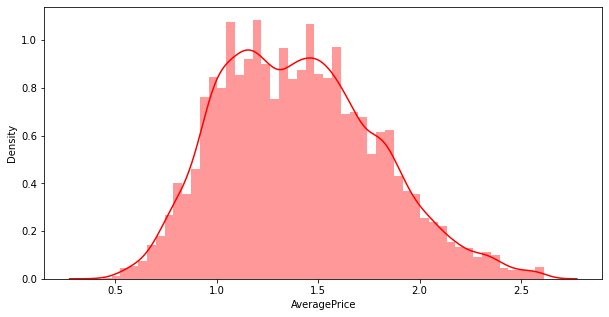

Total Volume = 3.766817460227148


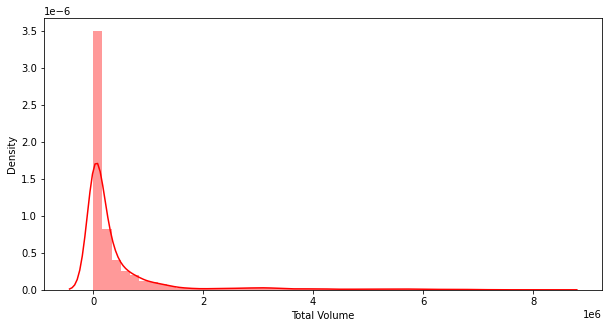

4046 = 4.909430545745403


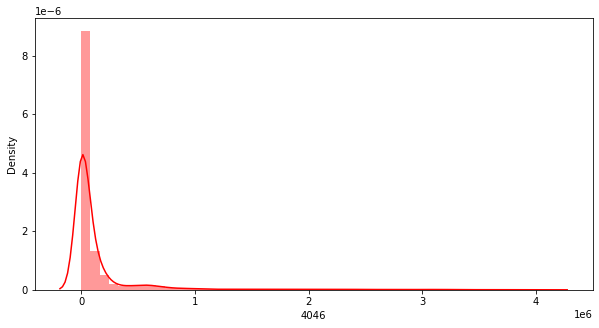

4225 = 4.4553666869204385


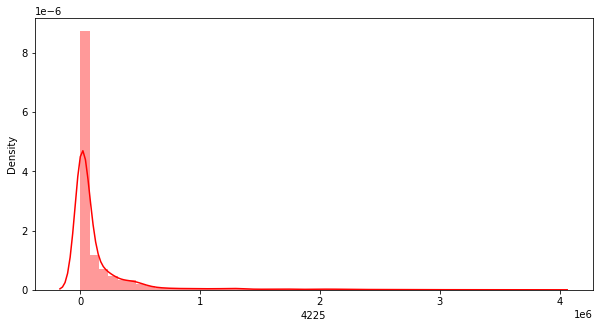

4770 = 5.116734807241112


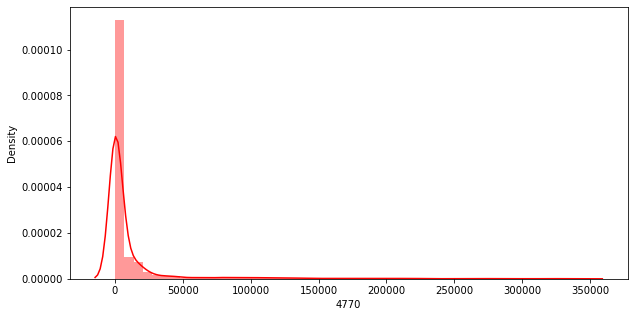

Total Bags = 4.066425697892518


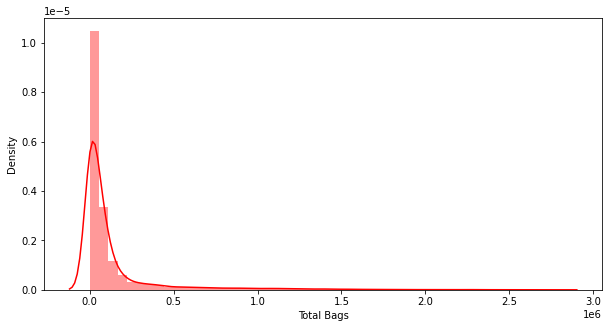

Small Bags = 4.222346729177929


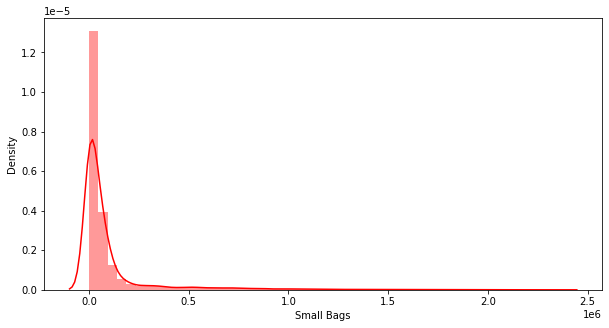

Large Bags = 5.053004778723615


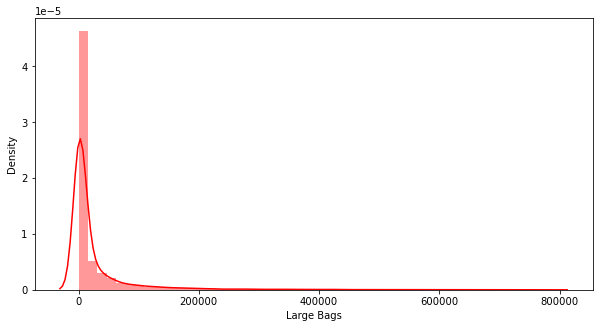

XLarge Bags = 6.135085987805901


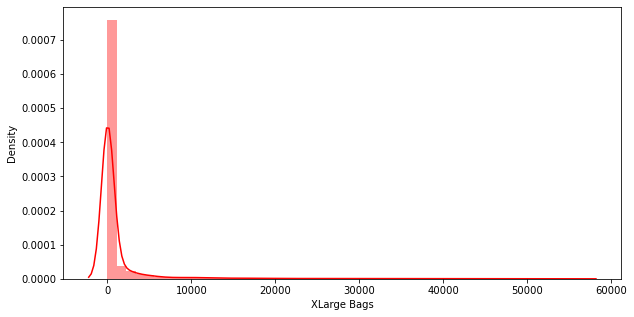

type = -0.03773828974617157


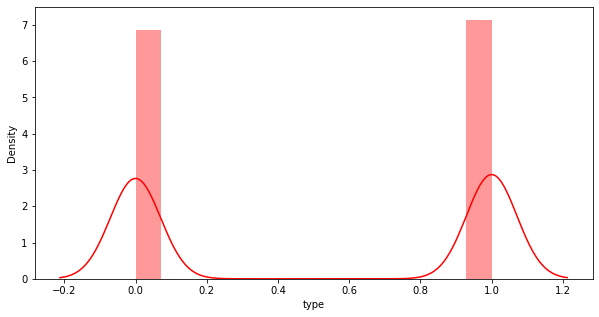

region = 0.012796802985344687


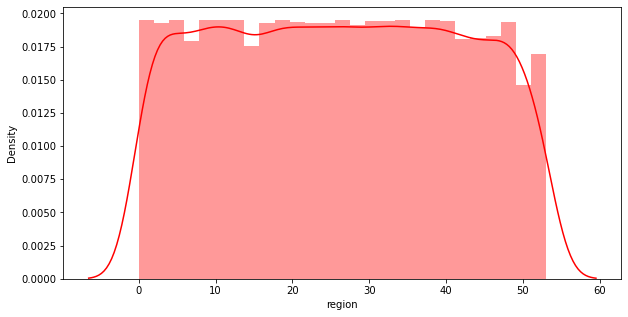

Month = 0.10739842919607963


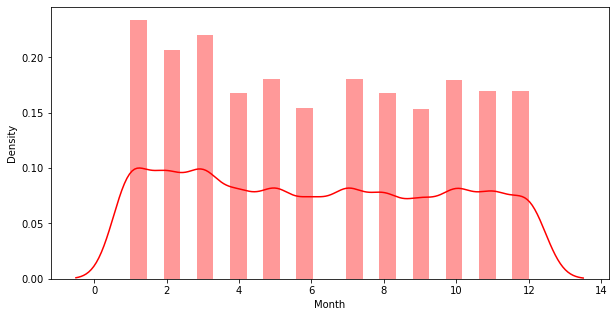

Year = 0.22995657079700343


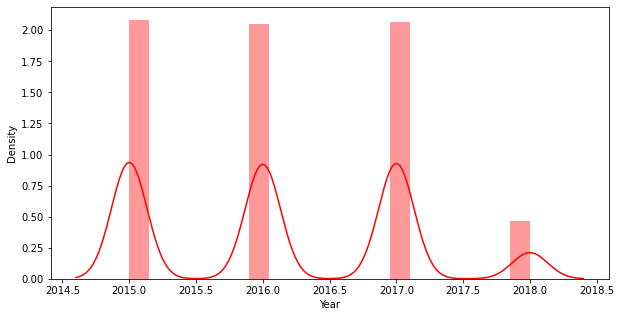

Date = 0.011776823737838314


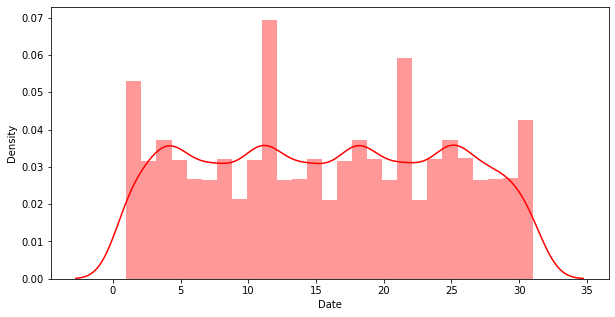

In [48]:
from scipy.stats import skew
for i in dfr_new:
    print(i, "=", skew(dfr_new[i]))
    plt.figure(figsize=(10,5))
    sns.distplot(dfr_new[i], kde = True, color= 'red')
    plt.show()

skewed columns are: 4046, "4225", "4770", "Small Bags", "Large Bags","XLarge Bags",'Total volumne','total Bags'

# Splitting the Data Frame

In [49]:
x = dfr_new.drop('AveragePrice', axis=1)
x.head()

Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0      64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1      54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2     118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3      78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4      51039.60   941.48   43838.39   75.78     6183.95     5986.26   

   Large Bags  XLarge Bags  type  region  Month  Year  Date  
0       93.25          0.0     0       0     12  2015    27  
1       97.49          0.0     0       0     12  2015    20  
2      103.14          0.0     0       0     12  2015    13  
3      133.76          0.0     0       0     12  2015     6  
4      197.69          0.0     0       0     11  2015    29

In [50]:
y= dfr_new['AveragePrice']
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

# Removing Skewness

In [51]:
# using yeo johnson method to remove skewness
x = dfr_new.drop('AveragePrice',axis=1)
from sklearn.preprocessing import PowerTransformer
power_t = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(power_t.fit_transform(x), columns=x.columns)
x.head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.075324 -0.657421  0.351430 -0.222566   -0.537507   -0.347421   
1     -0.147497 -0.777179  0.269513 -0.175223   -0.498128   -0.311322   
2      0.205556 -0.731776  0.649333  0.023923   -0.566369   -0.374453   
3      0.019655 -0.632592  0.468799 -0.121164   -0.713068   -0.510991   
4     -0.180674 -0.684504  0.262126 -0.110491   -0.686312   -0.490534   

   Large Bags  XLarge Bags      type   region     Month      Year      Date  
0   -0.781153    -0.677919 -1.019047 -2.01059  1.491383 -1.210647  1.227565  
1   -0.771198    -0.677919 -1.019047 -2.01059  1.491383 -1.210647  0.538229  
2   -0.758523    -0.677919 -1.019047 -2.01059  1.491383 -1.210647 -0.218959  
3   -0.699123    -0.677919 -1.019047 -2.01059  1.491383 -1.210647 -1.094426  
4   -0.607027    -0.677919 -1.019047 -2.01059  1.276081 -1.210647  1.415364

In [52]:
x.skew().sort_values()

region         -0.257799
Date           -0.208926
Month          -0.146554
Large Bags     -0.110913
4225           -0.044675
4046           -0.039282
type           -0.037741
Small Bags     -0.024405
Total Bags     -0.022204
Total Volume   -0.008642
4770            0.024168
Year            0.227731
XLarge Bags     0.853758
dtype: float64

we can almost all skewness is removed except for Xlarge Bags.I have tried using np.log and sqrt to remove the skewness of xlarge bags but intead it has increased more. so i ma keeping it as it is the minimum.

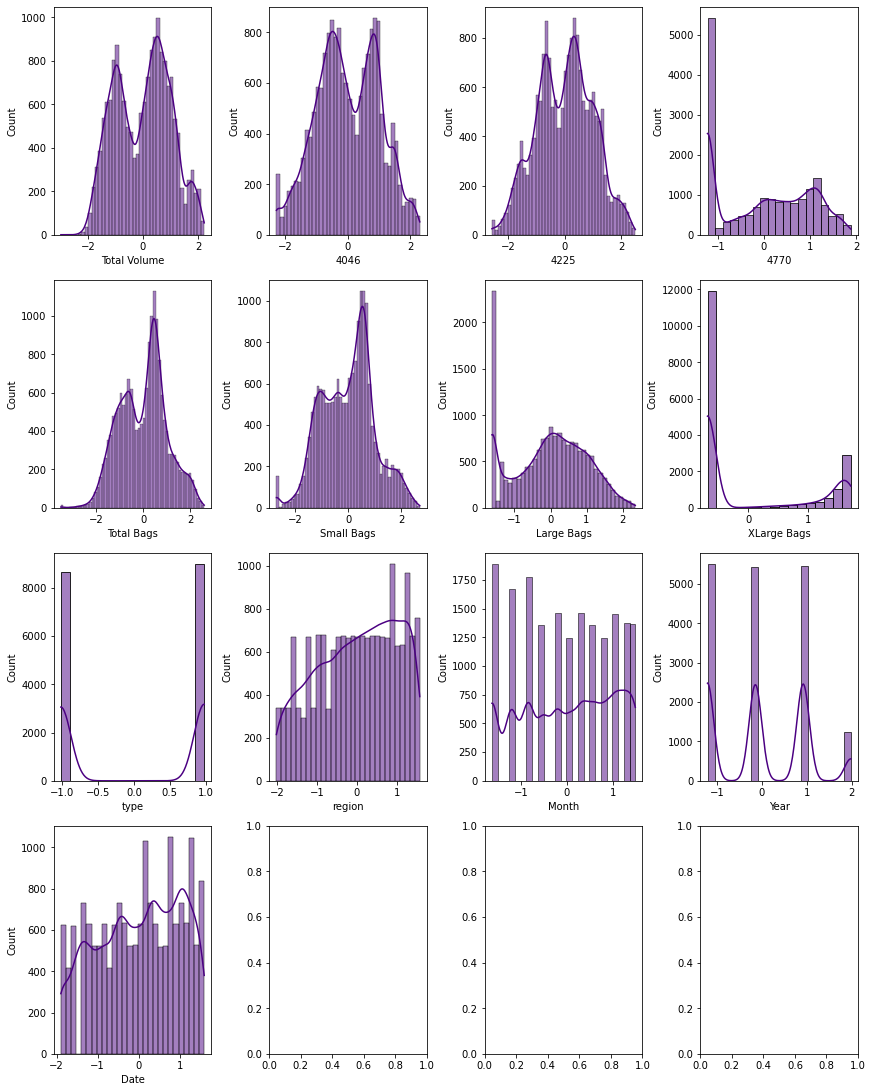

In [55]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(12,15))
index = 0
ax = ax.flatten()
for col, value in x.items():
    sns.histplot(value, ax=ax[index], color="indigo", kde=True)
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

Skewness is almost removed

# Scaling the data

In [56]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head(10)

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.075324 -0.657421  0.351430 -0.222566   -0.537507   -0.347421   
1     -0.147497 -0.777179  0.269513 -0.175223   -0.498128   -0.311322   
2      0.205556 -0.731776  0.649333  0.023923   -0.566369   -0.374453   
3      0.019655 -0.632592  0.468799 -0.121164   -0.713068   -0.510991   
4     -0.180674 -0.684504  0.262126 -0.110491   -0.686312   -0.490534   
5     -0.138386 -0.619795  0.299851 -0.247063   -0.652694   -0.455137   
6      0.044933 -0.578498  0.478728 -0.059144   -0.557098   -0.366844   
7      0.169853 -0.765399  0.618720 -0.097083   -0.643362   -0.472755   
8      0.127401 -0.661412  0.551754 -0.081098   -0.417343   -0.243481   
9     -0.008259 -0.715569  0.423999 -0.011663   -0.541123   -0.373498   

   Large Bags  XLarge Bags      type   region     Month      Year      Date  
0   -0.781153    -0.677919 -1.019047 -2.01059  1.491383 -1.210618  1.227565  
1   -0.771198    -0.677919 -1.019047 -2.01059  1.491383 -1.210618  0.538229  
2   -0.758523    -0.677919 -1.019047 -2.01059  1.491383 -1.210618 -0.218959  
3   -0.699123    -0.677919 -1.019047 -2.01059  1.491383 -1.210618 -1.094426  
4   -0.607027    -0.677919 -1.019047 -2.01059  1.276081 -1.210618  1.415364  
5   -0.710296    -0.677919 -1.019047 -2.01059  1.276081 -1.210618  0.740891  
6   -0.720228    -0.677919 -1.019047 -2.01059  1.276081 -1.210618  0.006290  
7   -0.343397    -0.677919 -1.019047 -2.01059  1.276081 -1.210618 -0.826404  
8   -0.518690    -0.677919 -1.019047 -2.01059  1.276081 -1.210618 -1.895018  
9   -0.342420    -0.677919 -1.019047 -2.01059  1.053194 -1.210618  1.036030

I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Checking Multicollinearity:

In [57]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF FACTOR"]= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

calc_vif(x)

variables  VIF FACTOR
0   Total Volume   53.829912
1           4046    7.251220
2           4225   11.387028
3           4770    3.953827
4     Total Bags   35.128954
5     Small Bags   16.625127
6     Large Bags    3.460862
7    XLarge Bags    2.057938
8           type    3.702255
9         region    1.087868
10         Month    1.061697
11          Year    1.402586
12          Date    1.000909

as we can see Total Volume, Total Bags, 4225, Small Bags shows high multicollinearity we need to treat them lets remove the highest i.e Total Volume

In [59]:
x = x.drop('Total Volume' , axis =1)
calc_vif(x)

variables  VIF FACTOR
0          4046    3.749834
1          4225    4.328378
2          4770    3.940332
3    Total Bags   24.589642
4    Small Bags   16.624211
5    Large Bags    3.417015
6   XLarge Bags    2.044197
7          type    3.484299
8        region    1.080717
9         Month    1.059794
10         Year    1.400005
11         Date    1.000804

In [60]:
x = x.drop('Total Bags' , axis =1)
calc_vif(x)

variables  VIF FACTOR
0          4046    3.728475
1          4225    4.172197
2          4770    3.940044
3    Small Bags    4.131396
4    Large Bags    1.872064
5   XLarge Bags    2.043535
6          type    3.480493
7        region    1.080711
8         Month    1.058634
9          Year    1.373075
10         Date    1.000653

Hence we have cleared multicollinerity

# Finding Best Random State

In [61]:
max_Accu=0
max_RS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>max_Accu:
        max_Accu=r2
        max_RS=i

print("Best r2 score is", max_Accu,"on Random State", max_RS)

Best r2 score is 0.5404783828615802 on Random State 667


Hence we chose our random state value to be 667

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=667)

# Traing the data and finding the best model:



****************** LinearRegression() *******************


The training accuracy of is 0.5065860695034095
The test accuracy of is 0.5404783828615802
R2 Score is: 54.047838286158026
Cross Validation Scores [-1.0087825   0.24175842  0.04479124  0.46804112  0.12994744  0.17930519
  0.19407075]
Maximum of cvs: 0.46804111692141825
Cross Validation Score: 46.804111692141824
R2 Score - Cross Validation Score is 7.243726594016202
Error Calculations:
Mean absolute error : 0.207121856656446
Mean squared error :  0.0685207268966787
Root mean squared error: 0.2617646402719028


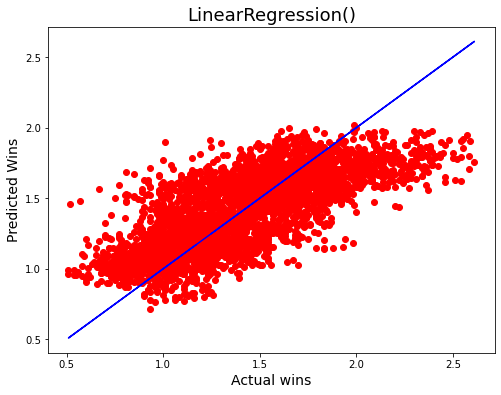



****************** SVR() *******************


The training accuracy of is 0.7999006745735155
The test accuracy of is 0.7874555074408974
R2 Score is: 78.74555074408974
Cross Validation Scores [-1.35855291  0.36786098  0.39895973  0.34699868  0.32557421  0.40779103
  0.27466854]
Maximum of cvs: 0.40779102609920526
Cross Validation Score: 40.77910260992053
R2 Score - Cross Validation Score is 37.96644813416921
Error Calculations:
Mean absolute error : 0.1333971457368591
Mean squared error :  0.03169318392185337
Root mean squared error: 0.1780257956641491


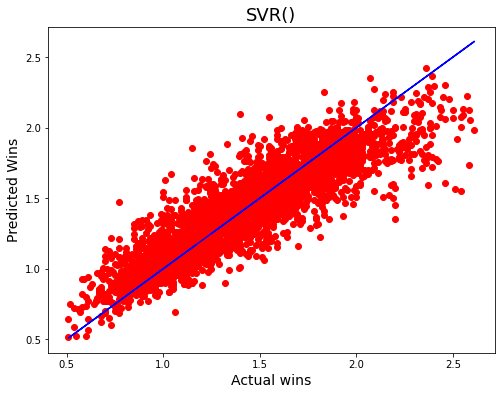



****************** DecisionTreeRegressor() *******************


The training accuracy of is 1.0
The test accuracy of is 0.769083189262169
R2 Score is: 76.90831892621691
Cross Validation Scores [-0.93636155 -0.00518262  0.10688064  0.34091887 -0.20662005 -0.36287737
 -0.1820798 ]
Maximum of cvs: 0.3409188743709368
Cross Validation Score: 34.09188743709368
R2 Score - Cross Validation Score is 42.816431489123225
Error Calculations:
Mean absolute error : 0.1232625318606627
Mean squared error :  0.034432738600962895
Root mean squared error: 0.18556060627450777


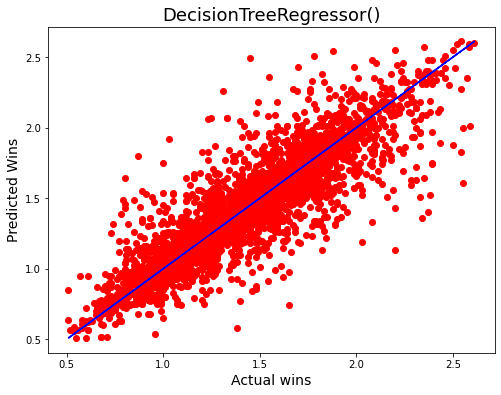



****************** KNeighborsRegressor() *******************


The training accuracy of is 0.8557572469060408
The test accuracy of is 0.7798121318100485
R2 Score is: 77.98121318100485
Cross Validation Scores [-0.79097003  0.14211197  0.14924657  0.47641     0.13946505  0.15234099
 -0.03385268]
Maximum of cvs: 0.47640999849400123
Cross Validation Score: 47.640999849400124
R2 Score - Cross Validation Score is 30.340213331604723
Error Calculations:
Mean absolute error : 0.1312563013310677
Mean squared error :  0.03283291192296799
Root mean squared error: 0.18119854282793776


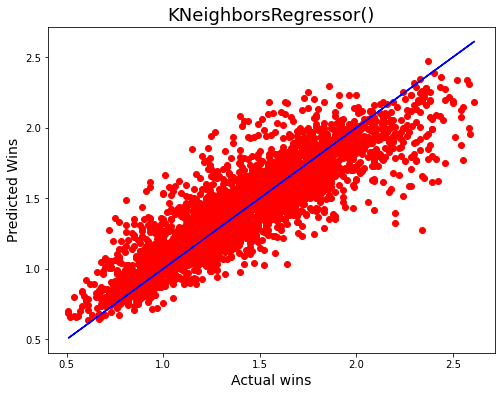



****************** Ridge(alpha=0.01, normalize=True) *******************


The training accuracy of is 0.506344136324923
The test accuracy of is 0.5402947464926684
R2 Score is: 54.02947464926684
Cross Validation Scores [-0.97525086  0.24326181  0.05141822  0.47018615  0.12821658  0.17595448
  0.18905481]
Maximum of cvs: 0.4701861501936361
Cross Validation Score: 47.01861501936361
R2 Score - Cross Validation Score is 7.01085962990323
Error Calculations:
Mean absolute error : 0.20705135404433767
Mean squared error :  0.06854810949852638
Root mean squared error: 0.26181693890679875


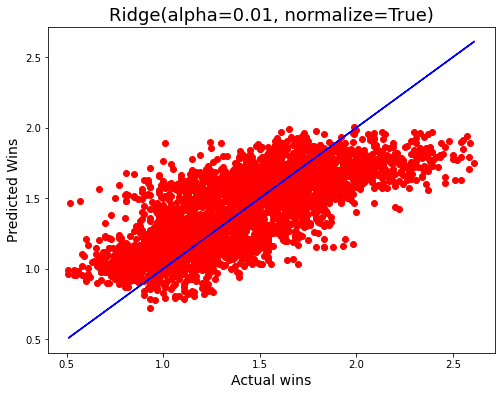



****************** Lasso(alpha=0.01, max_iter=100, normalize=True) *******************


The training accuracy of is 0.0
The test accuracy of is -5.7602208853424486e-05
R2 Score is: -0.005760220885342449
Cross Validation Scores [-5.04243946 -1.75811221 -0.23754466 -0.02785671 -0.67784675 -0.39367922
 -0.77525168]
Maximum of cvs: -0.02785670632244619
Cross Validation Score: -2.785670632244619
R2 Score - Cross Validation Score is 2.7799104113592765
Error Calculations:
Mean absolute error : 0.3164674335288497
Mean squared error :  0.14912176334298283
Root mean squared error: 0.38616287152312145


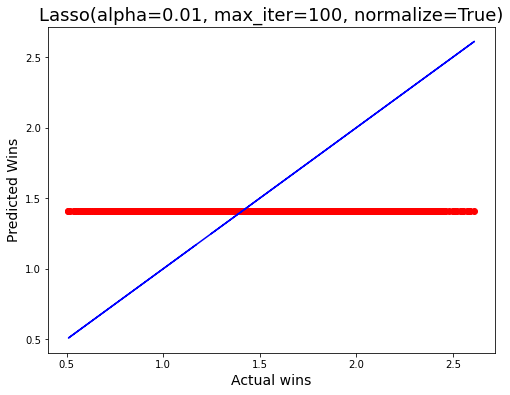



****************** RandomForestRegressor() *******************


The training accuracy of is 0.9840483868135093
The test accuracy of is 0.8866442448560201
R2 Score is: 88.66442448560201
Cross Validation Scores [-0.36237426  0.22700726  0.55638792  0.63646611  0.39498568  0.37953319
  0.2154215 ]
Maximum of cvs: 0.6364661119599633
Cross Validation Score: 63.64661119599633
R2 Score - Cross Validation Score is 25.017813289605684
Error Calculations:
Mean absolute error : 0.09077136788445198
Mean squared error :  0.016902836451430186
Root mean squared error: 0.13001090897086362


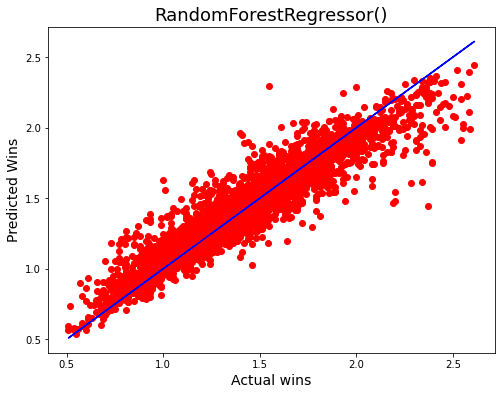



****************** GradientBoostingRegressor(loss='quantile', max_depth=5, n_estimators=200) *******************


The training accuracy of is 0.5159952473686892
The test accuracy of is 0.5093178160932923
R2 Score is: 50.93178160932923
Cross Validation Scores [-2.15090635  0.27595503  0.3142384   0.2838074  -0.31659043 -0.15836134
  0.08156884]
Maximum of cvs: 0.314238397927743
Cross Validation Score: 31.4238397927743
R2 Score - Cross Validation Score is 19.50794181655493
Error Calculations:
Mean absolute error : 0.20756120796496624
Mean squared error :  0.07316717791409061
Root mean squared error: 0.2704943214082148


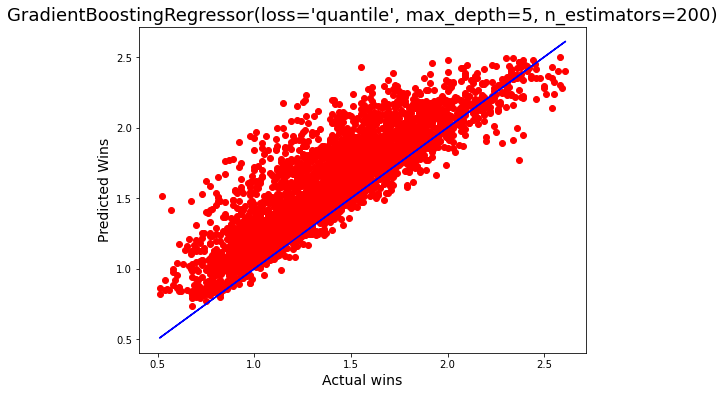



****************** AdaBoostRegressor(learning_rate=1.05, n_estimators=300, random_state=42) *******************


The training accuracy of is 0.5469439883930938
The test accuracy of is 0.5564138563265244
R2 Score is: 55.641385632652444
Cross Validation Scores [-1.92275005  0.16254722  0.18780794  0.48831251  0.19685803  0.25910919
  0.21047007]
Maximum of cvs: 0.48831251131977904
Cross Validation Score: 48.83125113197791
R2 Score - Cross Validation Score is 6.810134500674536
Error Calculations:
Mean absolute error : 0.20954625517040412
Mean squared error :  0.06614453786761765
Root mean squared error: 0.25718580417203757


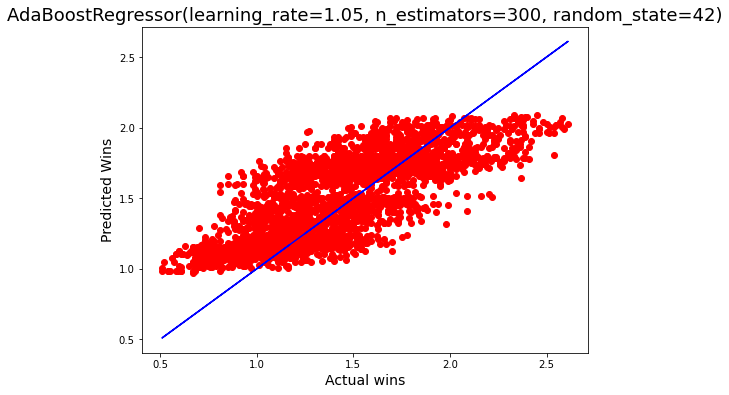



****************** ExtraTreesRegressor(max_features='sqrt', n_estimators=200, n_jobs=6) *******************


The training accuracy of is 0.9999999999904781
The test accuracy of is 0.8923518198330715
R2 Score is: 89.23518198330716
Cross Validation Scores [0.17537914 0.42980676 0.48945084 0.65613354 0.46804576 0.44061446
 0.26769859]
Maximum of cvs: 0.6561335422052098
Cross Validation Score: 65.61335422052097
R2 Score - Cross Validation Score is 23.621827762786182
Error Calculations:
Mean absolute error : 0.09031825261965451
Mean squared error :  0.016051761830218062
Root mean squared error: 0.12669554779161762


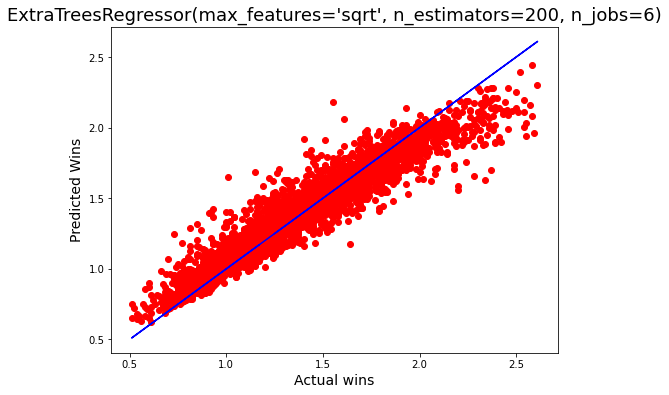



****************** XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...) *******************


The training accuracy of is 0.9611094239261244
The test accuracy of is 0.9003687568715006
R2 Score is: 90.03687568715006
Cross Validation Scores [0.06192116 0.56243773 0.69022941 0.69001299 0.49207106 0.5740266
 0.38394685]
Max

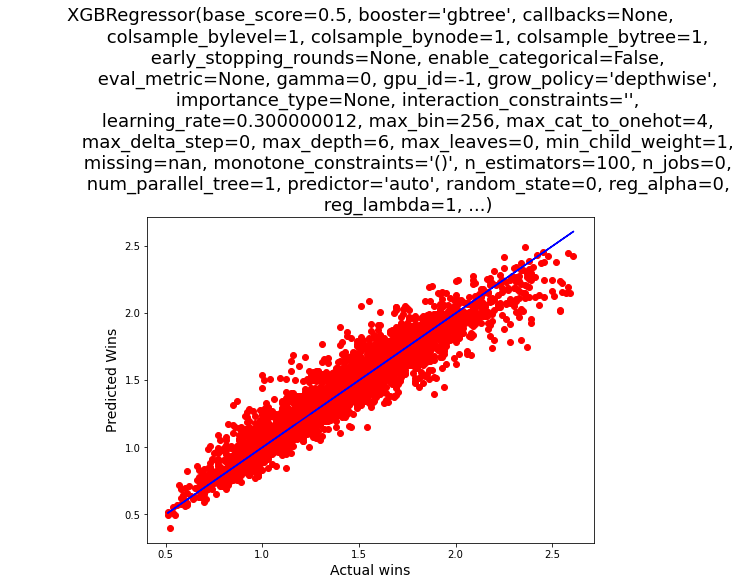

In [63]:

lg  = LinearRegression()
svr = SVR(kernel='rbf')
dtr = DecisionTreeRegressor()
knr = KNeighborsRegressor()
ridr= Ridge(alpha=1e-2, normalize=True)
las = Lasso(alpha=1e-2, normalize=True, max_iter=100)
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
abr = AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
etr = ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
xg  = XGBRegressor()

model=[lg,svr,dtr,knr,ridr,las,rfr,gbr,abr,etr,xg]

for m in model:
    print('\n')
    print('******************',m,'*******************')
    print('\n')
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    
    # calculating scores
    train_score=r2_score(y_train,pred_train)
    test_score=r2_score(y_test,pred_test)
    r2 = r2_score(y_test, pred_test)*100
    
    #Calculating cross validation score
   
    for i in range(2,8):
        cvs=cross_val_score(m,x,y,cv=i)
        
    a = max(cvs)
    cv_score=(a.mean())*100    # taking max value of cvs and calculating mean of it    
# taking max value because I am assuming that r2 score of all models to be approx 100 %

    
    # final result comparing r2 and cross validation
    result = r2 - cv_score
    
    
    print('The training accuracy of is', train_score)
    print('The test accuracy of is', test_score)
    print("R2 Score is:", r2)
    print("Cross Validation Scores",cvs)
    print("Maximum of cvs:" , a)
    print("Cross Validation Score:", cv_score)
    print("R2 Score - Cross Validation Score is", result)
    print("Error Calculations:")
    print("Mean absolute error :",mean_absolute_error(y_test,pred_test))
    print("Mean squared error : ",mean_squared_error(y_test, pred_test))
    print("Root mean squared error:", np.sqrt(mean_squared_error(y_test,pred_test)))
    
    plt.figure(figsize=(8,6))
    plt.scatter(x=y_test,y=pred_test,color='r')
    plt.plot(y_test,y_test,color='b')
    plt.xlabel('Actual wins',fontsize=14)
    plt.ylabel('Predicted Wins',fontsize=14)
    plt.title(m,fontsize=18)
    plt.show()
    


In [64]:
#Plotting performance table

Performance_table=pd.DataFrame({'Model':['LR','SVR','DTR','KNR','ridge','lasso','RFR','GBR','ABR','ETR','XGB'],
           'Trainig Score':[0.50,0.79,1.0,0.85,0.50,0,0.98,0.49,0.54,1.0,0.96],
           'Testing score':[0.54,0.78,0.76,0.77,0.54,0,0.88,0.49,0.55,0.9,0.90],                      
            'R2 Score': [54.04,78.7,76.88,77.98,54.02,0,88.55,49.18,55.64,89.15,90.03],
            'CV Score': [46.80,40.79,35.87,47.64,47.01,-2.7,63.35,34.4,48.83,66.79,69.02],
            'Result' :[7.24,37.96,41.49,30.34,7.01,2.77,25.20,14.75,6.81,22.36,21.01],
           'RMSE':[0.26,0.17,0.18,0.18,0.26,0.38,0.13,0.27,0.25,0.12,0.12],
            'MSE':[0.06,0.03,0.03,0.03,0.06,0.14,0.01,0.07,0.06,0.01,0.01]})

Performance_table

Model  Trainig Score  Testing score  R2 Score  CV Score  Result  RMSE  \
0      LR           0.50           0.54     54.04     46.80    7.24  0.26   
1     SVR           0.79           0.78     78.70     40.79   37.96  0.17   
2     DTR           1.00           0.76     76.88     35.87   41.49  0.18   
3     KNR           0.85           0.77     77.98     47.64   30.34  0.18   
4   ridge           0.50           0.54     54.02     47.01    7.01  0.26   
5   lasso           0.00           0.00      0.00     -2.70    2.77  0.38   
6     RFR           0.98           0.88     88.55     63.35   25.20  0.13   
7     GBR           0.49           0.49     49.18     34.40   14.75  0.27   
8     ABR           0.54           0.55     55.64     48.83    6.81  0.25   
9     ETR           1.00           0.90     89.15     66.79   22.36  0.12   
10    XGB           0.96           0.90     90.03     69.02   21.01  0.12   

     MSE  
0   0.06  
1   0.03  
2   0.03  
3   0.03  
4   0.06  
5   0.14  
6   0.01  
7   0.07  
8   0.06  
9   0.01  
10  0.01

As we can see that Ridge, Linear, Adabooster and XGB has less difference in R2 and CV score but out of these only XGB has good training and testing score also less error so I chose XGB

# Hypertuning

In [65]:
fmod_param = {'n_estimators' : [200, 400, 600],
              'gamma' : [2.0, 3.0, 4.0],
              'max_depth' : [4, 6, 8],
              'n_jobs' : [-2, -1, 1]}

In [66]:
GCV = GridSearchCV(XGBRegressor(), fmod_param, cv=5)   # using grid search cv for hypertuning best model

In [67]:
GCV.fit(x_train,y_train)   

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'gamma': [2.0, 3.0, 4.0], 'max_depth': [4, 6, 8],
                         'n_estimators': [200, 400, 600],
                         'n_jobs': [-2, -1, 1]})

In [68]:
GCV.best_params_

{'gamma': 2.0, 'max_depth': 8, 'n_estimators': 200, 'n_jobs': -2}

In [69]:
GCV.best_score_

0.7689964251231023

In [70]:
# lets try GCV on Adabooster

In [71]:
param= {'n_estimators' : [200, 400, 600],
        'learning_rate':[1.0,2.0,5.0,6.0],
        'random_state':[20,40,50,60]}

In [72]:
GCV1 = GridSearchCV(AdaBoostRegressor(),param, cv=5) 

In [73]:
GCV1.fit(x_train,y_train)   

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [1.0, 2.0, 5.0, 6.0],
                         'n_estimators': [200, 400, 600],
                         'random_state': [20, 40, 50, 60]})

In [74]:
GCV1.best_params_

{'learning_rate': 2.0, 'n_estimators': 200, 'random_state': 20}

In [75]:
GCV1.best_score_

0.5610023312441078

We can see that XGB Regressor gives best results
So i select XGB regressor

In [76]:
# fitting hypertuning paramerter in final model
Final_Model = XGBRegressor(gamma= 2.0, max_depth= 8, n_estimators= 200, n_jobs= -2)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_r2 = r2_score(y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 79.99856308393277


Our regression model is performing with 80% of accuracy

# Saving the Model

In [77]:
import joblib
filename = "FinalModelRegression_E02.pkl"
joblib.dump(Final_Model, filename)

['FinalModelRegression_E02.pkl']

# Task 2 - Predicting / Finding Region 

Here we are doing are task 2 given in problem statement where now our target variable is region and all other are feature variables
As region is categorical column this becomes now a classification problem and we need to proceed in that manner
Earlier we had copied our original data lets use that for predicting region

In [78]:
#importing all required libraries for classification

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


In [79]:
dfc.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  12/27/2015          1.33      64236.62  1036.74   54454.85   
1           1  12/20/2015          1.35      54876.98   674.28   44638.81   
2           2  12/13/2015          0.93     118220.22   794.70  109149.67   
3           3   12/6/2015          1.08      78992.15  1132.00   71976.41   
4           4  11/29/2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [80]:
dfc.drop('Unnamed: 0', axis=1,inplace=True)
dfc.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  12/27/2015          1.33      64236.62  1036.74   54454.85   48.16   
1  12/20/2015          1.35      54876.98   674.28   44638.81   58.33   
2  12/13/2015          0.93     118220.22   794.70  109149.67  130.50   
3   12/6/2015          1.08      78992.15  1132.00   71976.41   72.58   
4  11/29/2015          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

# EDA

In [81]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [82]:
dfc.shape

(18249, 13)

we have 18249 rows and 13 columns

In [83]:
dfc.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

As we have checked earlier their are no null or duplicate values. So we can proceed with further pre-processing.

In [84]:
dfc.describe().T

count           mean           std      min       25%  \
AveragePrice  18249.0       1.405978  4.026766e-01     0.44      1.10   
Total Volume  18249.0  850644.013009  3.453545e+06    84.56  10838.58   
4046          18249.0  293008.424531  1.264989e+06     0.00    854.07   
4225          18249.0  295154.568356  1.204120e+06     0.00   3008.78   
4770          18249.0   22839.735993  1.074641e+05     0.00      0.00   
Total Bags    18249.0  239639.202060  9.862424e+05     0.00   5088.64   
Small Bags    18249.0  182194.686696  7.461785e+05     0.00   2849.42   
Large Bags    18249.0   54338.088145  2.439660e+05     0.00    127.47   
XLarge Bags   18249.0    3106.426507  1.769289e+04     0.00      0.00   
year          18249.0    2016.147899  9.399385e-01  2015.00   2015.00   

                    50%        75%          max  
AveragePrice       1.37       1.66         3.25  
Total Volume  107376.76  432962.29  62505646.52  
4046            8645.30  111020.20  22743616.17  
4225           29061.02  150206.86  20470572.61  
4770             184.99    6243.42   2546439.11  
Total Bags     39743.83  110783.37  19373134.37  
Small Bags     26362.82   83337.67  13384586.80  
Large Bags      2647.71   22029.25   5719096.61  
XLarge Bags        0.00     132.50    551693.65  
year            2016.00    2017.00      2018.00

We can same results are noted above, I will just copy it from above to not scroll up everytime.

We can see descriptive statistics of numerical columns in our data

Count of all columns is same meaning no null values.

In every column mean is greater than median this means all numerical columns are right skewed.

High difference in 75 % and max value shows presence of outliers

Some min values are zero in 4046, 4225, 4770, Total Bags, Small Bags, Large Bags and XLarge Bags but they seem to be valid since there is a possibility of presence of a legitimate zero value.

In [85]:
# Lets handle the date column as it may hinder in our future pre-processing 

dfc['Month'], dfc['Day'], dfc['Year'] = dfc['Date'].str.split('/').str
dfc.drop(columns=['Date','year'], inplace=True)
dfc.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  region Month Day  Year  
0     8603.62       93.25          0.0  conventional  Albany    12  27  2015  
1     9408.07       97.49          0.0  conventional  Albany    12  20  2015  
2     8042.21      103.14          0.0  conventional  Albany    12  13  2015  
3     5677.40      133.76          0.0  conventional  Albany    12   6  2015  
4     5986.26      197.69          0.0  conventional  Albany    11  29  2015

In [86]:
dfc['Year']=dfc['Year'].astype(int)
dfc['Month']=dfc['Month'].astype(int)
dfc['Date']=dfc['Day'].astype(int)
dfc.drop(columns=['Day'], inplace=True)
dfc.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  region  Month  Year  \
0     8603.62       93.25          0.0  conventional  Albany     12  2015   
1     9408.07       97.49          0.0  conventional  Albany     12  2015   
2     8042.21      103.14          0.0  conventional  Albany     12  2015   
3     5677.40      133.76          0.0  conventional  Albany     12  2015   
4     5986.26      197.69          0.0  conventional  Albany     11  2015   

   Date  
0    27  
1    20  
2    13  
3     6  
4    29

# Visualization

In [87]:
dfc.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region', 'Month',
       'Year', 'Date'],
      dtype='object')

• Univariate Analysis

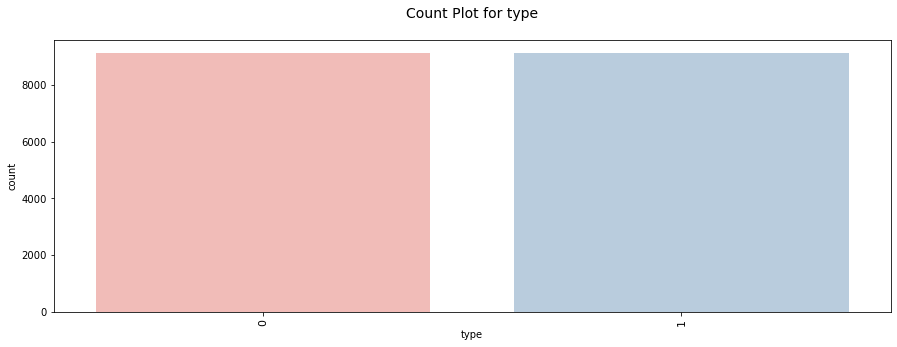

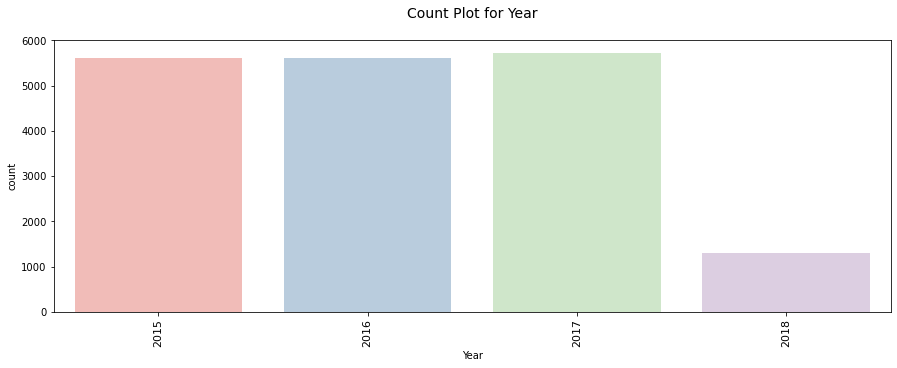

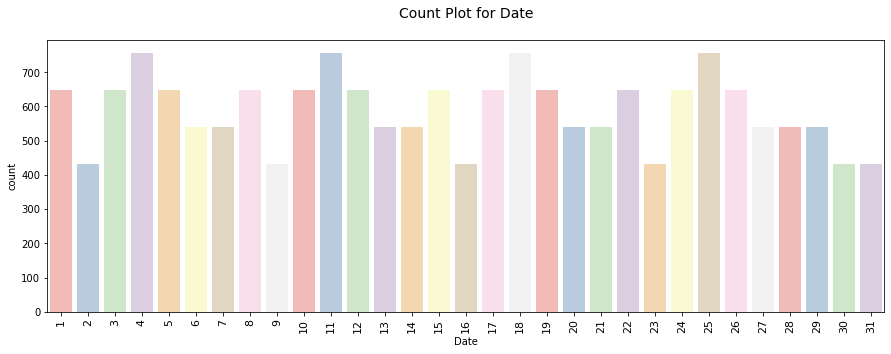

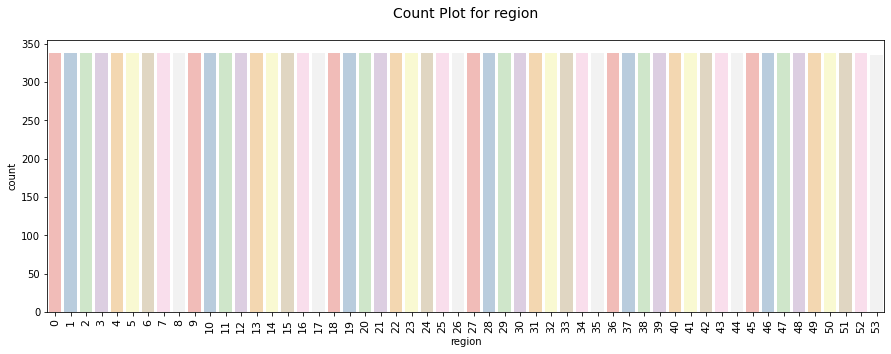

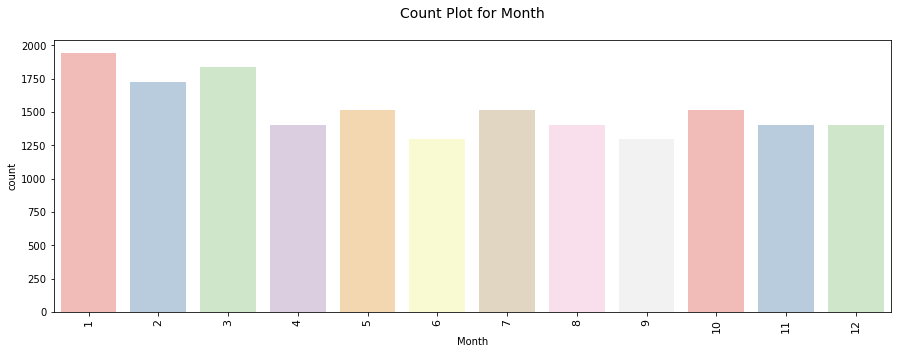

In [88]:
col=['type','Year','Date','region','Month']

for i in col:
    
    plt.figure(figsize=(15,5))
    sns.countplot(dfr[i], palette= 'Pastel1')

    plt.xticks(rotation=90,fontsize =11)
    plt.title(f"Count Plot for {i}\n", fontsize =14)

From above plot we can see that region is balanced data. same is with type of avocados where as year 2018 has very less sales as compared to others
Also sales are maximum in january.
On dates 4,11,18,25 there are more sales 

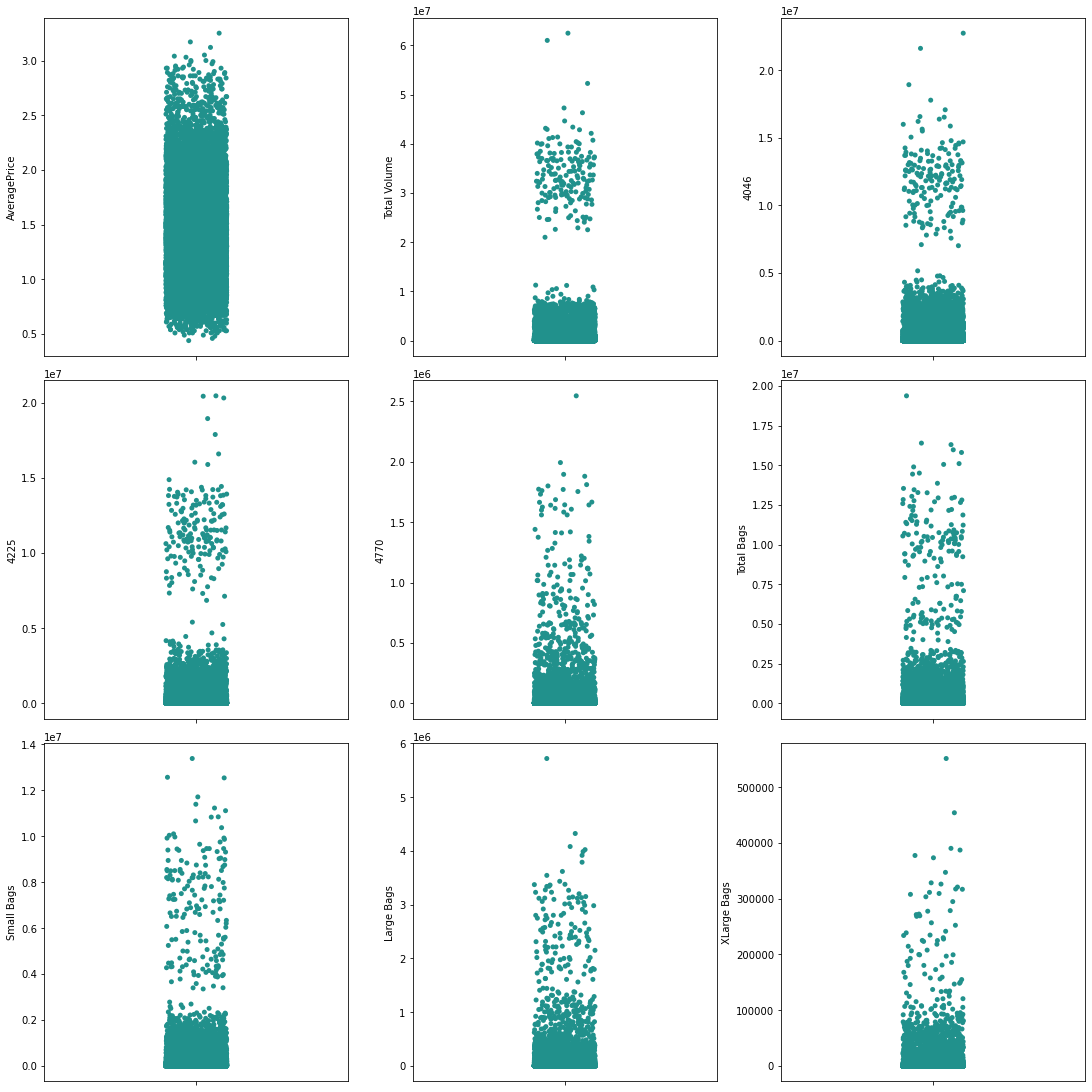

In [89]:
s = ['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(15,15))
index = 0

ax = ax.flatten()
for col in s:
    sns.stripplot(y=col, data=dfc, ax=ax[index], palette="viridis")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

Total Volume 4046,4225, 4770,Total Bags, Small Bags, Large bags, Xlarge bags have points further away from the general accumulation indicating presence of outliers

we got same results in univariate analysis

We have compared many variables with each other like type n PLU, type n total bags, type and total volume, year and avg price, year and PLU, yer and Small, large and XLarge bags etc. 
As the dataset is same these observation will also be same only in this classification problem we need to study the dataset i.e the featuree columns wrt to region variable as it is our target.
So not plotting the same graph and in addition to the above study we will plot graphs/study dataset wrt to region variable now.

Lets do bivariate analysis with respect to region variable

• Bivariate Analysis

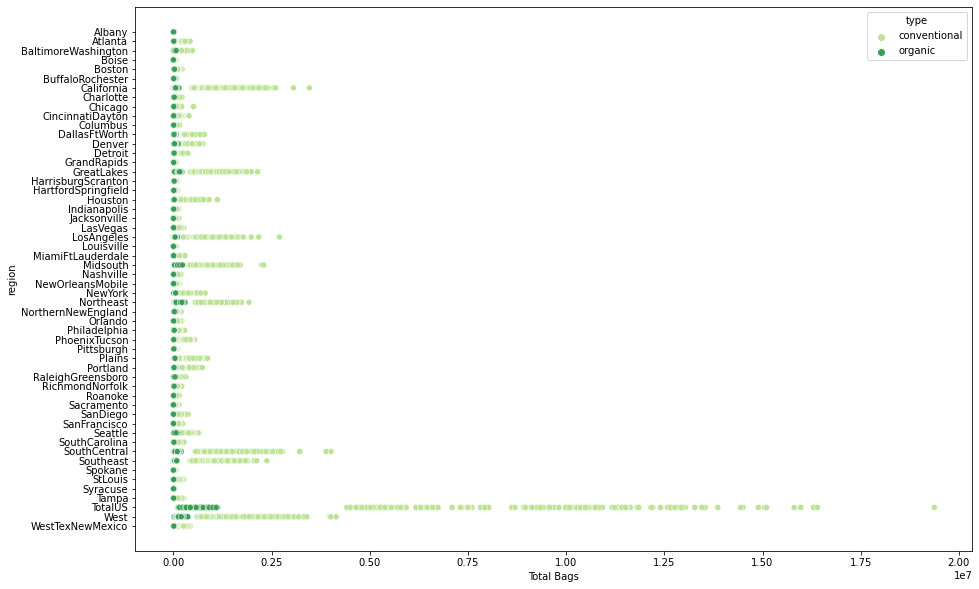

In [90]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="Total Bags", y="region",hue='type', data=dfc, palette="YlGn")
plt.show()

Total bags are maximum in Total Us which is obvious and also in west california,Los angeles, South central.

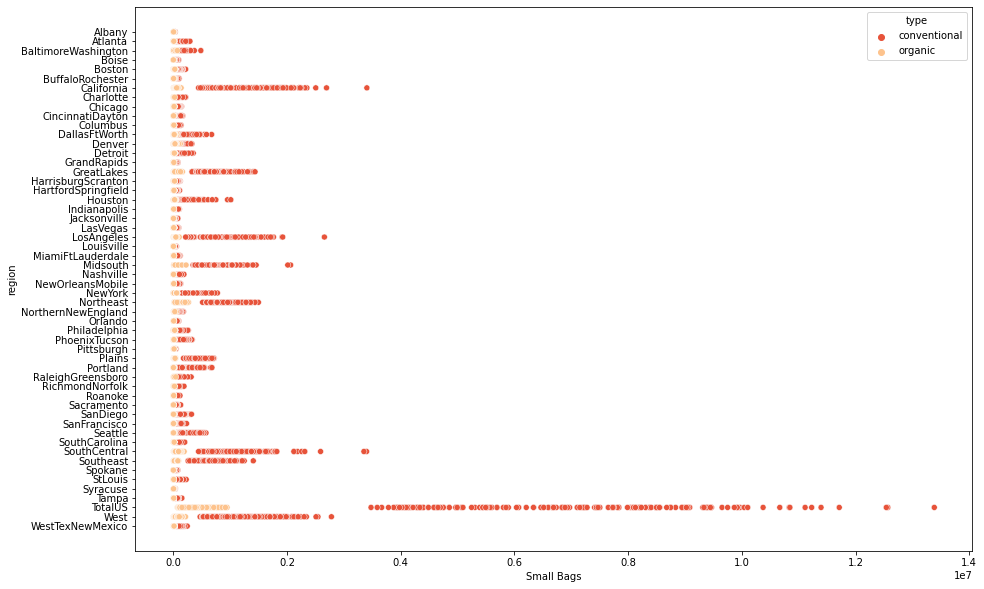

In [91]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="Small Bags", y="region", hue='type',data=dfc, palette="OrRd_r")
plt.show()

Total Us, California, South central, los angles shows increasing patterns.
WE can also see that conventional type of avocados are more in number than organic

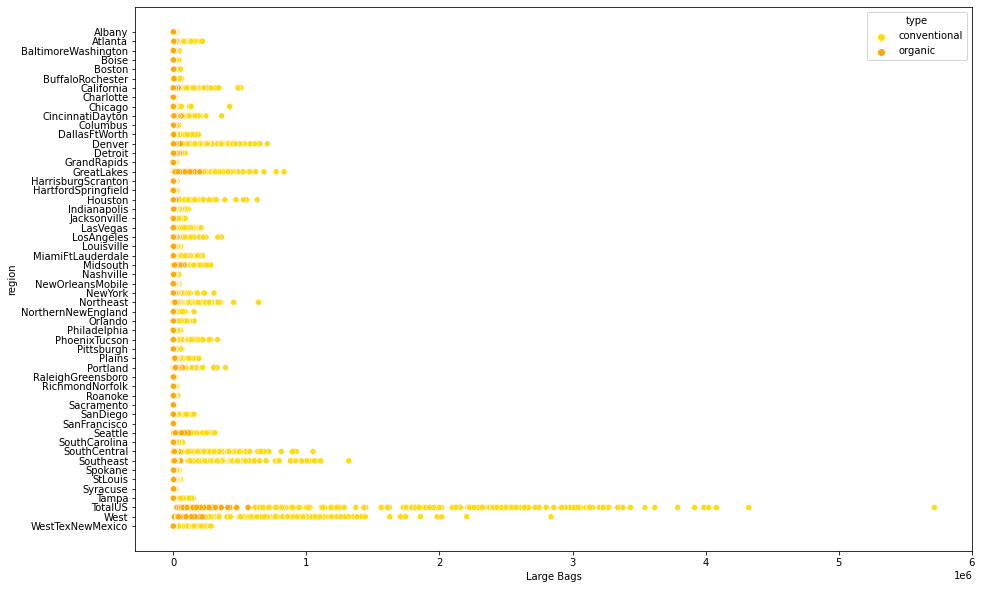

In [92]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="Large Bags", y="region",hue='type', data=dfc, palette="Wistia")
plt.show()

South east, west , South central, denver, great lakes, shows maximum sales of large bags in this region
WE can also see that conventional type of avocados are more in number than organic

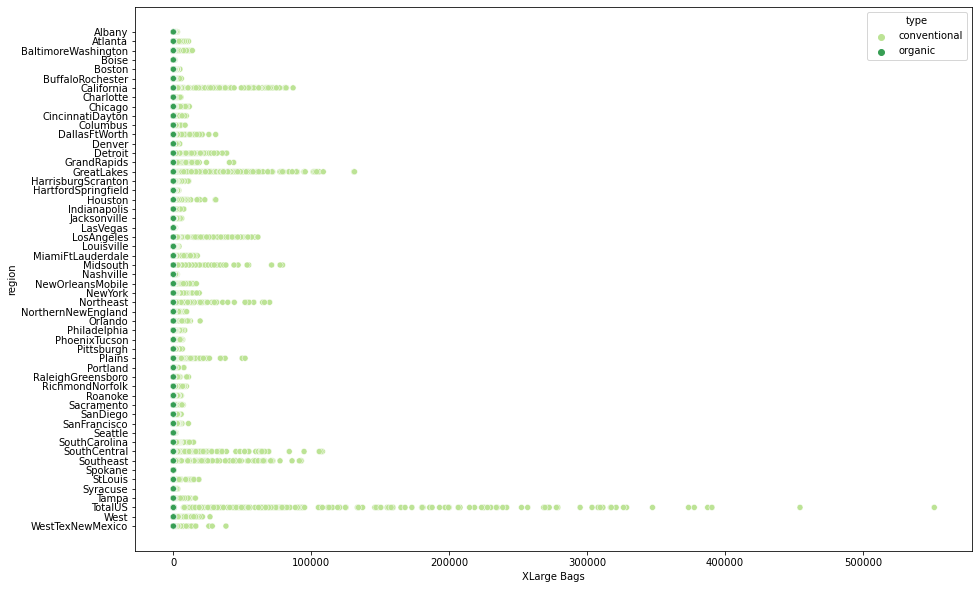

In [93]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="XLarge Bags", y="region",hue='type', data=dfc, palette="YlGn")
plt.show()

Total US, south central, south east, great lakes, california has maximum sales of Xlarge bags
WE can also see that conventional type of avocados are more in number than organic

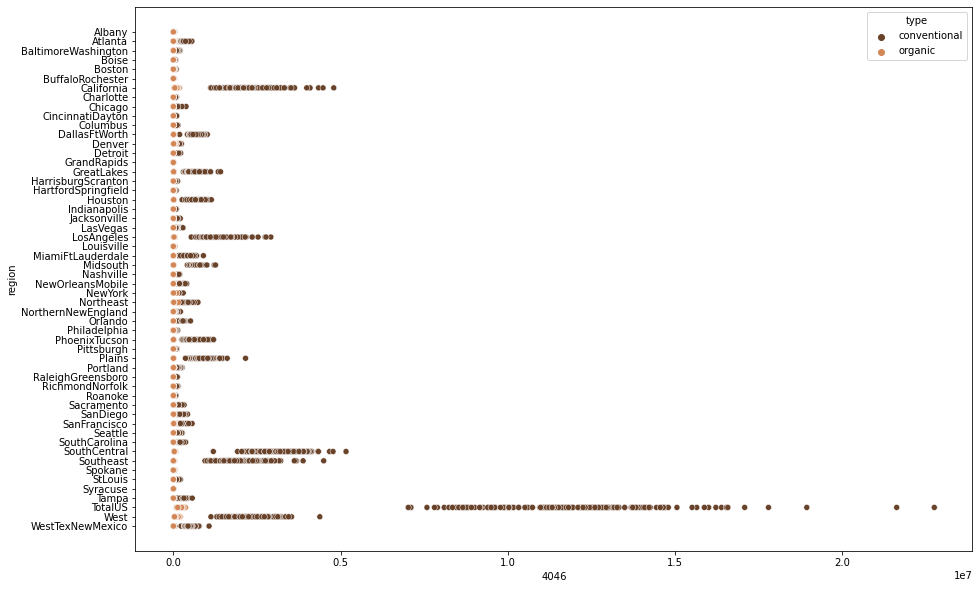

In [94]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="4046", y="region", hue='type',data=dfc, palette="copper")
plt.show()

PLU unit 4046 is maximum in region california, south central and south east
WE can also see that conventional type of avocados are more in number than organic

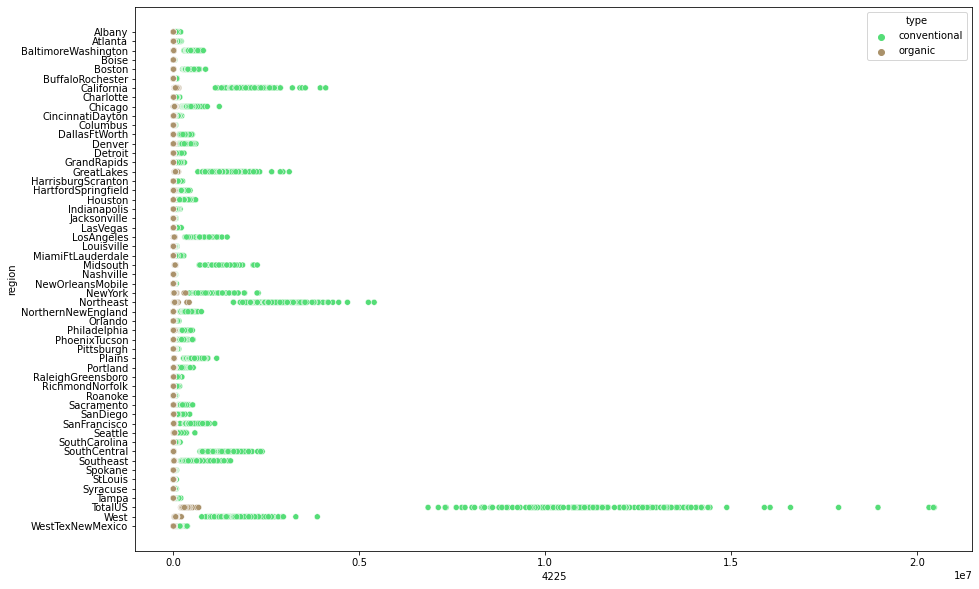

In [95]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="4225", y="region", hue='type',data=dfc, palette="terrain")
plt.show()

PLU unit 4046 is maximum in region california,great lakes and north east
WE can also see that conventional type of avocados are more in number than organic

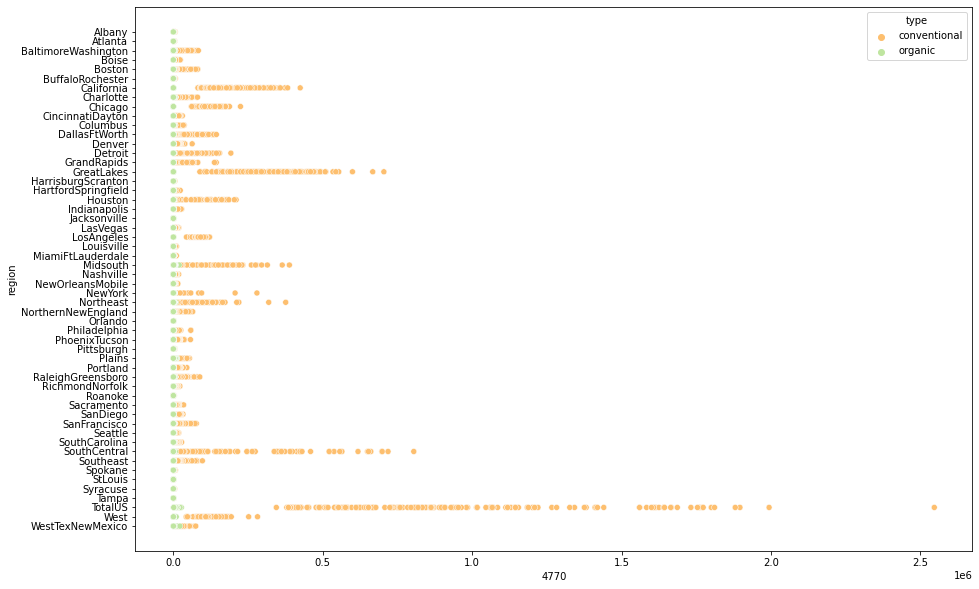

In [96]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="4770", y="region", hue='type',data=dfc, palette="Spectral")
plt.show()

PLU unit 4770 great lakes, south central, total Us.
Conventional avocados are more than organic 

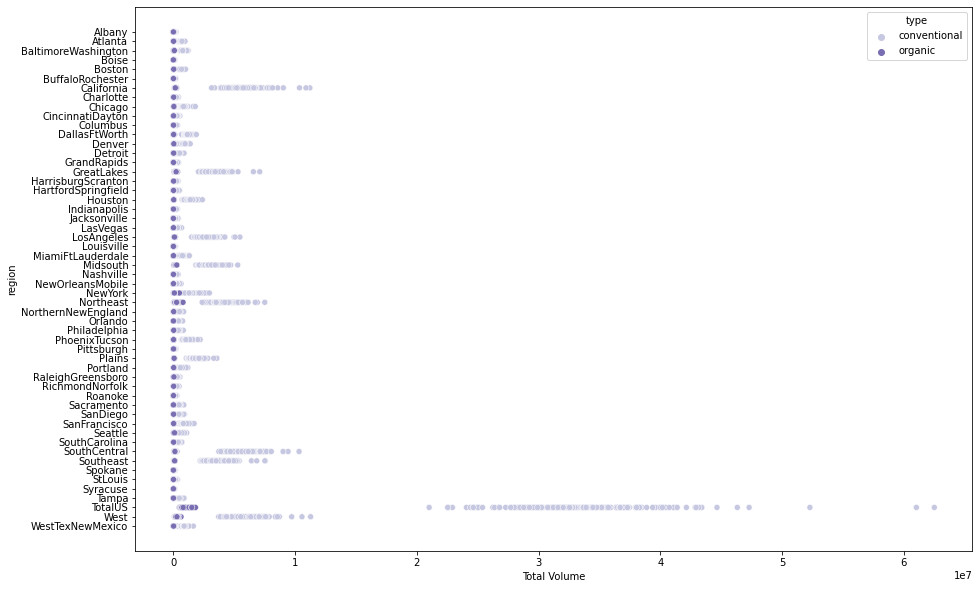

In [97]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="Total Volume", y="region", hue='type',data=dfc, palette="Purples")
plt.show()

Total volume is greater in regions like california,west and total us
Again here also conventional avocados are more than organic

# Encoding:

In [98]:
# lets convert our categorical columns to interger ones for further pre processing using label encode

le = LabelEncoder()
dfc['region']= le.fit_transform(dfc['region'])
dfc['type']= le.fit_transform(dfc['type'])

dfc.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  region  Month  Year  Date  
0     8603.62       93.25          0.0     0       0     12  2015    27  
1     9408.07       97.49          0.0     0       0     12  2015    20  
2     8042.21      103.14          0.0     0       0     12  2015    13  
3     5677.40      133.76          0.0     0       0     12  2015     6  
4     5986.26      197.69          0.0     0       0     11  2015    29

Now we can study correlation

# Correlation

In [99]:
dfc.corr().T

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
type              0.615845     -0.232434 -0.225819 -0.232289 -0.210027   
region           -0.011716      0.174176  0.192073  0.145726  0.095252   
Month             0.162409     -0.024689 -0.025803 -0.022108 -0.033424   
Year              0.093197      0.017193  0.003353 -0.009559 -0.036531   
Date              0.027386     -0.009747 -0.010159 -0.012393 -0.009009   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.615845   
Total Volume    0.963047    0.967238    0.880640     0.747157 -0.232434   
4046            0.920057    0.925280    0.838645     0.699377 -0.225819   
4225            0.905787    0.916031    0.810015     0.688809 -0.232289   
4770            0.792314    0.802733    0.698471     0.679861 -0.210027   
Total Bags      1.000000    0.994335    0.943009     0.804233 -0.217788   
Small Bags      0.994335    1.000000    0.902589     0.806845 -0.220535   
Large Bags      0.943009    0.902589    1.000000     0.710858 -0.193177   
XLarge Bags     0.804233    0.806845    0.710858     1.000000 -0.175483   
type           -0.217788   -0.220535   -0.193177    -0.175483  1.000000   
region          0.175256    0.164702    0.198768     0.082281 -0.000280   
Month          -0.022724   -0.023126   -0.020187    -0.012969 -0.000085   
Year            0.071552    0.063915    0.087891     0.081033 -0.000032   
Date           -0.004988   -0.003870   -0.008352     0.000319 -0.000013   

                region     Month      Year      Date  
AveragePrice -0.011716  0.162409  0.093197  0.027386  
Total Volume  0.174176 -0.024689  0.017193 -0.009747  
4046          0.192073 -0.025803  0.003353 -0.010159  
4225          0.145726 -0.022108 -0.009559 -0.012393  
4770          0.095252 -0.033424 -0.036531 -0.009009  
Total Bags    0.175256 -0.022724  0.071552 -0.004988  
Small Bags    0.164702 -0.023126  0.063915 -0.003870  
Large Bags    0.198768 -0.020187  0.087891 -0.008352  
XLarge Bags   0.082281 -0.012969  0.081033  0.000319  
type         -0.000280 -0.000085 -0.000032 -0.000013  
region        1.000000 -0.000144 -0.000055 -0.000021  
Month        -0.000144  1.000000 -0.177050  0.010621  
Year         -0.000055 -0.177050  1.000000  0.004475  
Date         -0.000021  0.010621  0.004475  1.000000

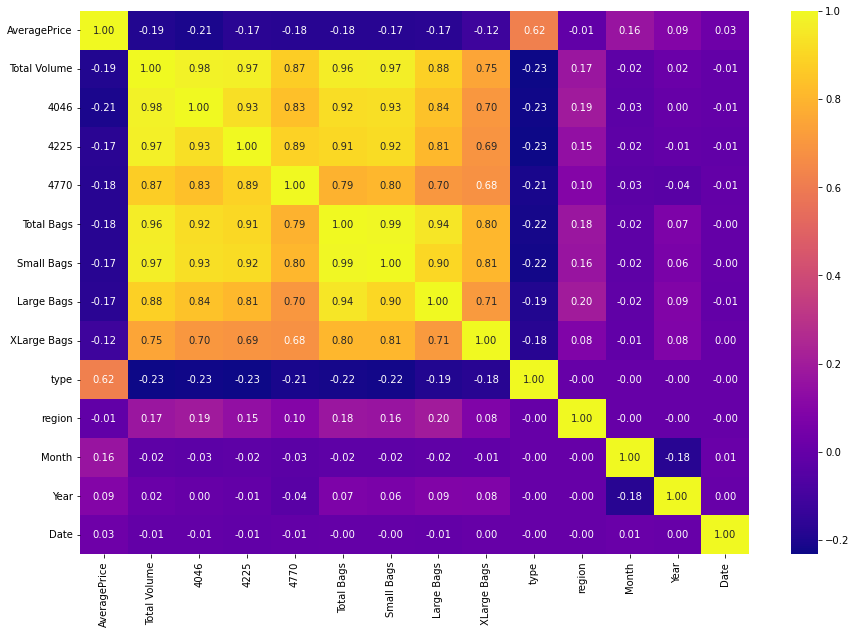

In [100]:
plt.figure(figsize=(15,10))
sns.heatmap(dfc.corr(), annot=True, fmt='0.2f', cmap='plasma')
plt.show()

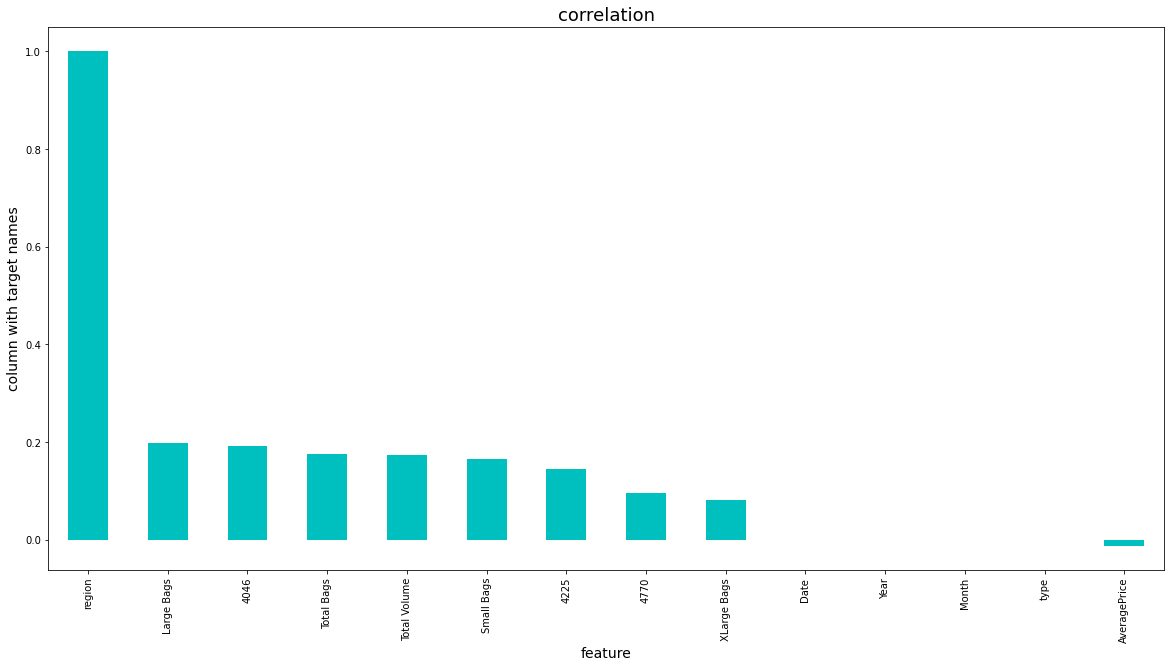

In [101]:
plt.figure(figsize=(20,10))
dfc.corr()['region'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

All are positively related or zero related except average price which is very badly and negaitvely correlated

# Checking Outliers

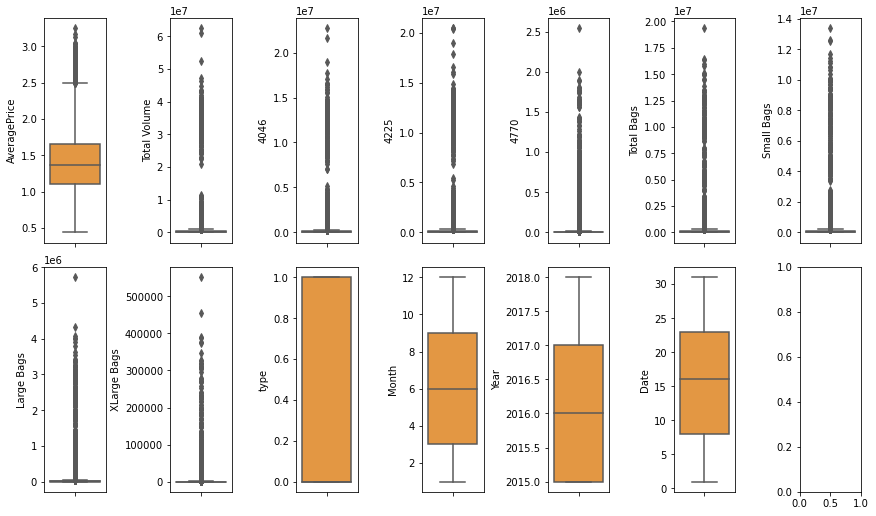

In [102]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(12,7))
index = 0
features = dfc.drop("region", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=dfc, ax=ax[index], palette="YlOrBr")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

We can see outliers are present in almost every column except Month, year date.
Lets remove outliers

# Removing Outliers:

In [103]:
z = np.array(abs(zscore(dfc)))
threshold = 3
print(np.where(z>3))
dfc_new=dfc[(z<3).all(axis=1)]
dfc_new.head()

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  region  Month  Year  Date  
0     8603.62       93.25          0.0     0       0     12  2015    27  
1     9408.07       97.49          0.0     0       0     12  2015    20  
2     8042.21      103.14          0.0     0       0     12  2015    13  
3     5677.40      133.76          0.0     0       0     12  2015     6  
4     5986.26      197.69          0.0     0       0     11  2015    29

In [104]:
dfc.shape

(18249, 14)

In [105]:
dfc_new.shape

(17651, 14)

In [106]:
data_loss = ((18249-17651)/18249)*100
data_loss

3.276891884486821

3 % data loss is affordable we can proceed

# Checking Skewness

In [107]:
dfc_new.skew().sort_values()

type           -0.037741
Date            0.011778
region          0.012798
Month           0.107408
Year            0.229976
AveragePrice    0.377432
Total Volume    3.767138
Total Bags      4.066771
Small Bags      4.222706
4225            4.455745
4046            4.909848
Large Bags      5.053434
4770            5.117170
XLarge Bags     6.135607
dtype: float64

AveragePrice = 0.37739979393858275


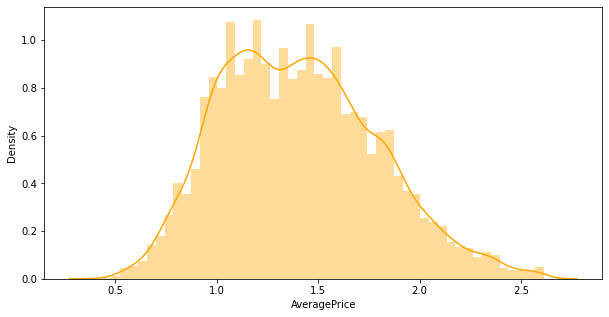

Total Volume = 3.766817460227148


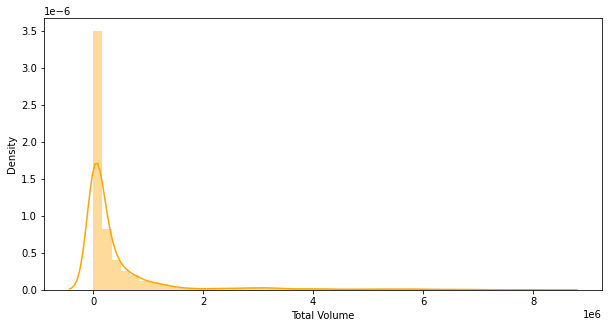

4046 = 4.909430545745403


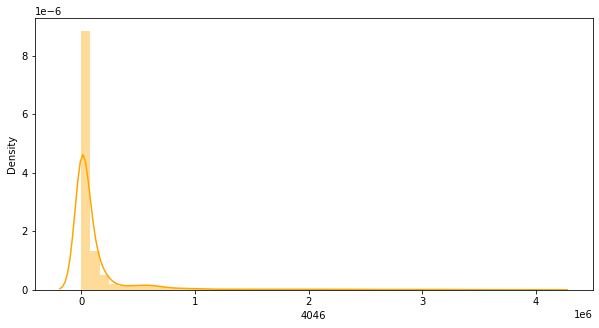

4225 = 4.4553666869204385


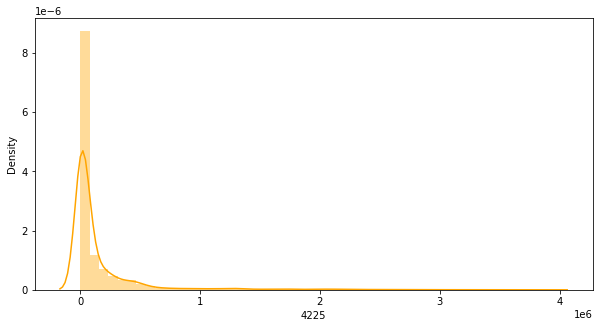

4770 = 5.116734807241112


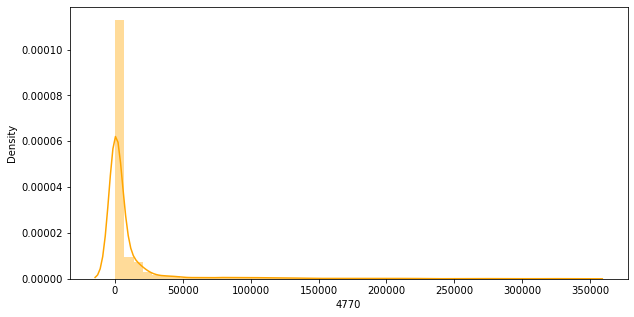

Total Bags = 4.066425697892518


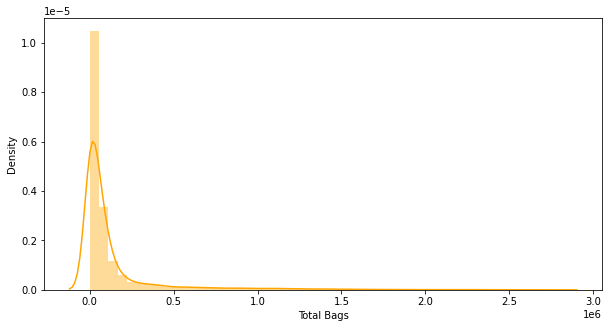

Small Bags = 4.222346729177929


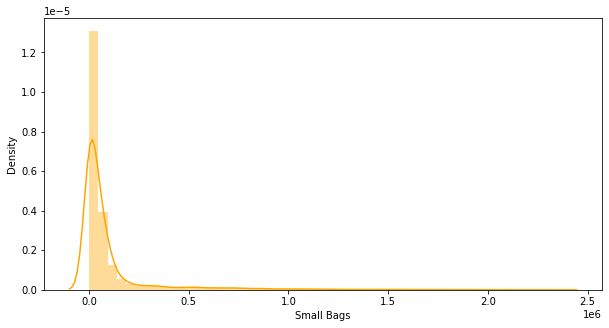

Large Bags = 5.053004778723615


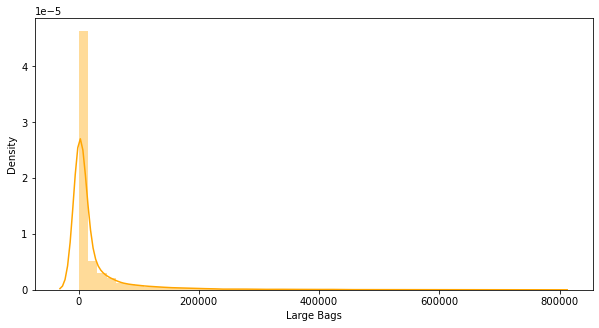

XLarge Bags = 6.135085987805901


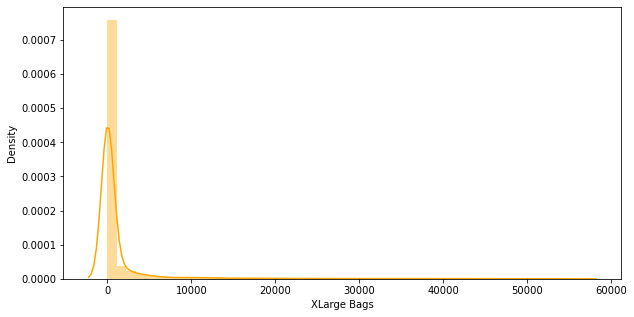

type = -0.03773828974617157


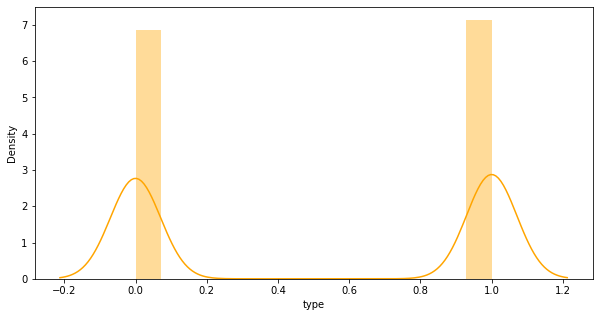

region = 0.012796802985344687


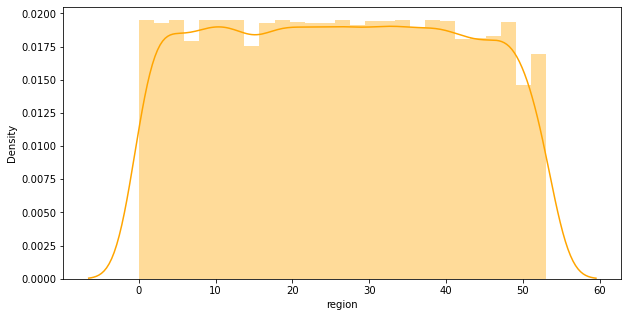

Month = 0.10739842919607963


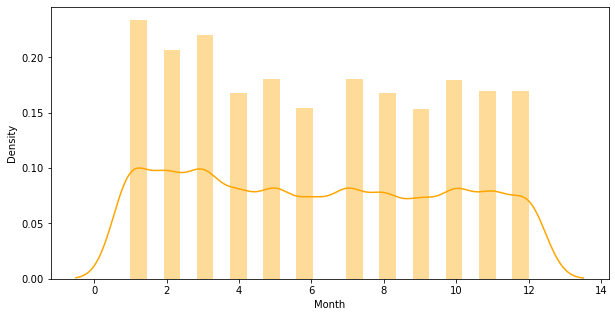

Year = 0.22995657079700343


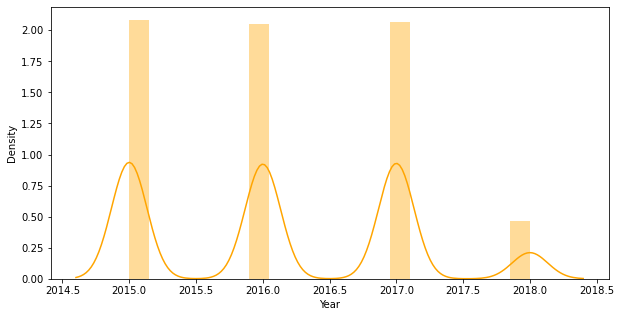

Date = 0.011776823737838314


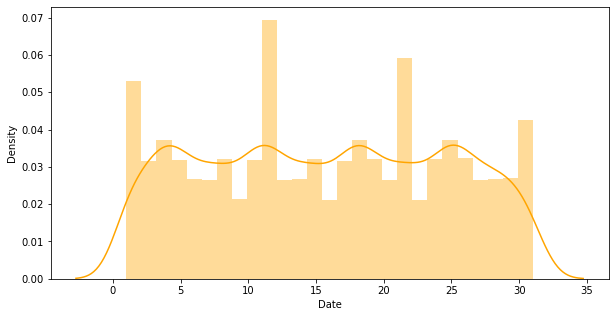

In [108]:
from scipy.stats import skew
for i in dfc_new:
    print(i, "=", skew(dfc_new[i]))
    plt.figure(figsize=(10,5))
    sns.distplot(dfc_new[i], kde = True, color= 'orange')
    plt.show()

Total Volume ,Total Bags, Small Bags, 4225 ,4046,Large Bags,4770, XLarge Bags all these columns are skewed

# Splitting the Dataframe

In [109]:
x = dfc_new.drop('region', axis=1)
x.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  Month  Year  Date  
0     8603.62       93.25          0.0     0     12  2015    27  
1     9408.07       97.49          0.0     0     12  2015    20  
2     8042.21      103.14          0.0     0     12  2015    13  
3     5677.40      133.76          0.0     0     12  2015     6  
4     5986.26      197.69          0.0     0     11  2015    29

In [110]:
y = dfc_new['region']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

# Removing Skewness:

In [111]:
# using yeo johnson method to remove skewness
power_t = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(power_t.fit_transform(x), columns=x.columns)
x.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0     -0.117824     -0.075324 -0.657421  0.351430 -0.222566   -0.537507   
1     -0.064330     -0.147497 -0.777179  0.269513 -0.175223   -0.498128   
2     -1.298865      0.205556 -0.731776  0.649333  0.023923   -0.566369   
3     -0.829026      0.019655 -0.632592  0.468799 -0.121164   -0.713068   
4     -0.253635     -0.180674 -0.684504  0.262126 -0.110491   -0.686312   

   Small Bags  Large Bags  XLarge Bags      type     Month      Year      Date  
0   -0.347421   -0.781153    -0.677919 -1.019047  1.491383 -1.210647  1.227565  
1   -0.311322   -0.771198    -0.677919 -1.019047  1.491383 -1.210647  0.538229  
2   -0.374453   -0.758523    -0.677919 -1.019047  1.491383 -1.210647 -0.218959  
3   -0.510991   -0.699123    -0.677919 -1.019047  1.491383 -1.210647 -1.094426  
4   -0.490534   -0.607027    -0.677919 -1.019047  1.276081 -1.210647  1.415364

In [112]:
x.skew().sort_values()

Date           -0.208926
Month          -0.146554
Large Bags     -0.110913
4225           -0.044675
4046           -0.039282
type           -0.037741
Small Bags     -0.024405
Total Bags     -0.022204
Total Volume   -0.008642
AveragePrice    0.000464
4770            0.024168
Year            0.227731
XLarge Bags     0.853758
dtype: float64

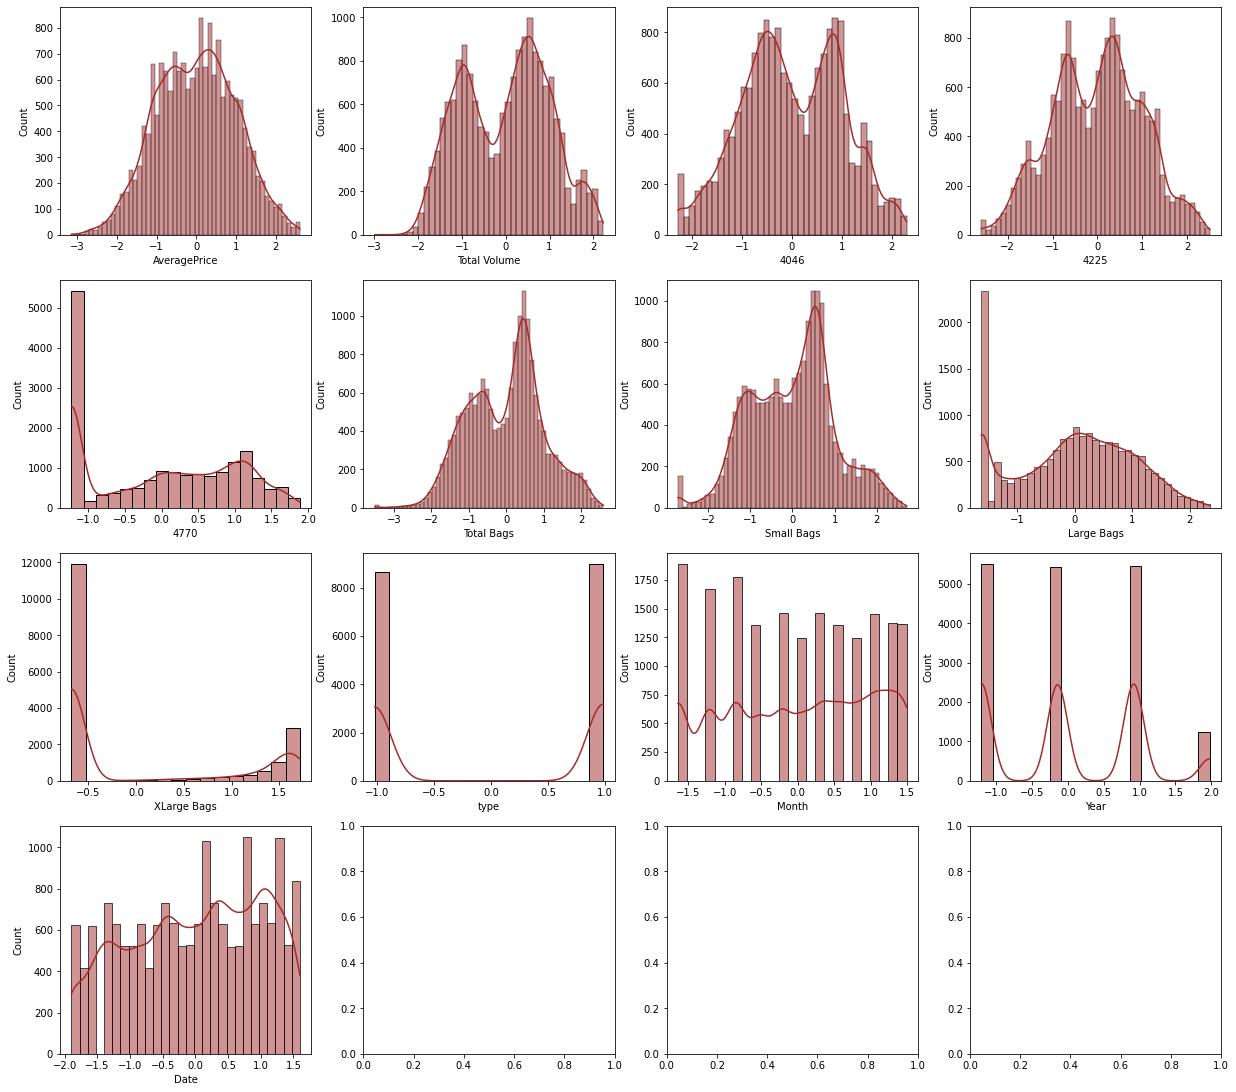

In [114]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(17,15))
index = 0
ax = ax.flatten()
for col, value in x.items():
    sns.histplot(value, ax=ax[index], color="brown", kde=True)
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

Almost all columns skewness is removed

# Scaling data using Standard Scaler

In [115]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head(10)

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0     -0.117824     -0.075324 -0.657421  0.351430 -0.222566   -0.537507   
1     -0.064330     -0.147497 -0.777179  0.269513 -0.175223   -0.498128   
2     -1.298865      0.205556 -0.731776  0.649333  0.023923   -0.566369   
3     -0.829026      0.019655 -0.632592  0.468799 -0.121164   -0.713068   
4     -0.253635     -0.180674 -0.684504  0.262126 -0.110491   -0.686312   
5     -0.308811     -0.138386 -0.619795  0.299851 -0.247063   -0.652694   
6     -1.106608      0.044933 -0.578498  0.478728 -0.059144   -0.557098   
7     -1.138237      0.169853 -0.765399  0.618720 -0.097083   -0.643362   
8     -1.012684      0.127401 -0.661412  0.551754 -0.081098   -0.417343   
9     -0.859257     -0.008259 -0.715569  0.423999 -0.011663   -0.541123   

   Small Bags  Large Bags  XLarge Bags      type     Month      Year      Date  
0   -0.347421   -0.781153    -0.677919 -1.019047  1.491383 -1.210618  1.227565  
1   -0.311322   -0.771198    -0.677919 -1.019047  1.491383 -1.210618  0.538229  
2   -0.374453   -0.758523    -0.677919 -1.019047  1.491383 -1.210618 -0.218959  
3   -0.510991   -0.699123    -0.677919 -1.019047  1.491383 -1.210618 -1.094426  
4   -0.490534   -0.607027    -0.677919 -1.019047  1.276081 -1.210618  1.415364  
5   -0.455137   -0.710296    -0.677919 -1.019047  1.276081 -1.210618  0.740891  
6   -0.366844   -0.720228    -0.677919 -1.019047  1.276081 -1.210618  0.006290  
7   -0.472755   -0.343397    -0.677919 -1.019047  1.276081 -1.210618 -0.826404  
8   -0.243481   -0.518690    -0.677919 -1.019047  1.276081 -1.210618 -1.895018  
9   -0.373498   -0.342420    -0.677919 -1.019047  1.053194 -1.210618  1.036030

# Multicollinearity

In [116]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF FACTOR"]= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

calc_vif(x)

variables  VIF FACTOR
0   AveragePrice    2.320850
1   Total Volume   54.865436
2           4046    6.909401
3           4225   12.456966
4           4770    3.963231
5     Total Bags   36.097442
6     Small Bags   17.365738
7     Large Bags    3.475930
8    XLarge Bags    2.051336
9           type    4.176746
10         Month    1.156292
11          Year    1.543745
12          Date    1.002490

Thus we will remove Total volume as it is showing highest multicollinearity

In [117]:
x = x.drop('Total Volume' , axis =1)
calc_vif(x)

variables  VIF FACTOR
0   AveragePrice    2.262079
1           4046    3.610253
2           4225    4.676343
3           4770    3.952931
4     Total Bags   26.910801
5     Small Bags   17.353418
6     Large Bags    3.422987
7    XLarge Bags    2.039345
8           type    4.044196
9          Month    1.156267
10          Year    1.543660
11          Date    1.002475

In [118]:
x = x.drop('Total Bags' , axis =1)
calc_vif(x)

variables  VIF FACTOR
0   AveragePrice    2.066954
1           4046    3.604827
2           4225    4.368967
3           4770    3.952554
4     Small Bags    4.178726
5     Large Bags    2.074000
6    XLarge Bags    2.038967
7           type    4.014760
8          Month    1.140918
9           Year    1.471717
10          Date    1.002475

Multicollinearity is removed we can proceed with our model training

# Balancing the data using SMOTE

In [119]:
y.value_counts()

0     338
16    338
49    338
44    338
39    338
38    338
35    338
34    338
32    338
30    338
26    338
23    338
19    338
18    338
27    338
8     338
2     338
13    338
12    338
11    338
4     338
5     338
10    338
9     338
20    337
1     337
28    337
33    336
41    336
40    336
14    336
50    336
31    335
24    335
25    333
48    333
21    333
53    332
7     332
22    331
17    331
36    330
3     329
37    328
47    328
43    326
29    325
46    307
42    301
45    292
6     290
15    272
52    256
51    169
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

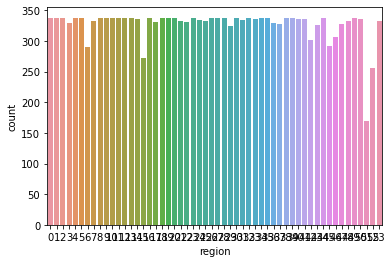

In [120]:
sns.countplot(y )

we can see our data is not balanced lets balance it

In [121]:
sm = SMOTE(random_state=0,k_neighbors=1)

x,y = sm.fit_resample(x, y)

In [122]:
x.shape

(18252, 11)

In [123]:
y.shape

(18252,)

<AxesSubplot:xlabel='region', ylabel='count'>

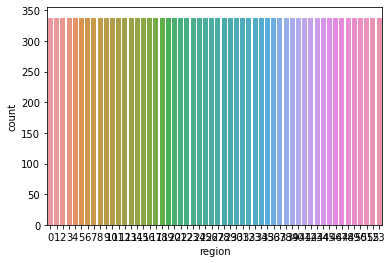

In [124]:
sns.countplot(y)

Now our data is balnced

# Finding the best Random State

In [125]:
max_Accu=0
max_RS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.32, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>max_Accu:
        max_Accu=acc_score
        max_RS=i

print("Best accuracy score is", max_Accu,"on Random State", max_RS)

Best accuracy score is 52.610854305769564 on Random State 376


taking random state as 376

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.32, random_state=376)

In [131]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC(probability=True,kernel ='poly')
dtc =DecisionTreeClassifier()
knn= KNeighborsClassifier()
rfc= RandomForestClassifier()
etc = ExtraTreesClassifier()
xg= xgb.XGBClassifier(verbosity = 0)
LGBM = lgb.LGBMClassifier()

model=[lg,gnb,dtc,knn,rfc,svc,etc,xg,LGBM]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    
    #Calculating cross validation score
    for i in range(2,8):
        cvs=cross_val_score(m,x,y,cv=i)
    
    a = max(cvs)
    cv_score=(a.mean())*100      # taking max value of cvs and calculating mean of it    
# taking max value because I am assuming that accuracy score of all models to be approx 100 %
    

    print(m)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,predm)*100)
    print("Cross Validation Score are :", cvs)
    print("Cross Validation Score:", cv_score)
    print("Accuracy Score - CV_Score", (accuracy_score(y_test,predm)*100)-(cv_score))
    print(confusion_matrix(y_test,predm))
   
    
    print('\n')
    print('-------------------------------------------------------------------------------')

LogisticRegression()
Accuracy Score of LogisticRegression() is: 52.610854305769564
Cross Validation Score are : [0.37806748 0.40874233 0.37768405 0.46605293 0.46797085 0.39432298
 0.42500959]
Cross Validation Score: 46.79708477176832
Accuracy Score - CV_Score 5.813769534001246
[[ 62   0   0 ...   0   0   0]
 [  0  48   0 ...   0   0   0]
 [  0   0  76 ...   0   0   6]
 ...
 [  0   0   0 ... 118   1   0]
 [  0   0   0 ...   0 107   0]
 [  0   7   1 ...   0   0  14]]


-------------------------------------------------------------------------------
GaussianNB()
Accuracy Score of GaussianNB() is: 8.868344461564801
Cross Validation Score are : [0.07400307 0.05406442 0.02415644 0.06367472 0.07057921 0.05600307
 0.06290756]
Cross Validation Score: 7.400306748466258
Accuracy Score - CV_Score 1.4680377130985427
[[ 10   0   0 ...   0   0   0]
 [  2   0   0 ...   0  21   4]
 [  0   0   1 ...   0   0   0]
 ...
 [  0   0   0 ... 119   0   0]
 [  0   0   0 ...   0  31   0]
 [ 15   0   0 ...   0  29 

lets make a performance table:

In [132]:
Performance_table = pd.DataFrame({"Model":['LR','GNB','DTC','KNC','RFC','SVC','ETC','XGB','LGBM'],
                                 "Accuracy_score":[52.61,8.86,78.32,60.17,91.61,68.94,92.62,88.90,90.15],
                                 "Cv Score":[46.79,7.40,69.97,49.96,86.73,57.89,86.92,81.32,82.51],
                                 "Result":[5.81,1.46,8.34,10.21,4.87,11.044,5.69,7.57,7.64],
                                 })

Performance_table

Model  Accuracy_score  Cv Score  Result
0    LR           52.61     46.79   5.810
1   GNB            8.86      7.40   1.460
2   DTC           78.32     69.97   8.340
3   KNC           60.17     49.96  10.210
4   RFC           91.61     86.73   4.870
5   SVC           68.94     57.89  11.044
6   ETC           92.62     86.92   5.690
7   XGB           88.90     81.32   7.570
8  LGBM           90.15     82.51   7.640

From above table it is clear that RFC is giving best results

# Hypertuning Parameters

In [143]:
param = {'n_estimators':[10,50,60],
        'criterion':['gini', 'entropy'],
        'max_features':['sqrt', 'log2','auto']} 

# refering parameter from sklearn google document

In [144]:
GCV = GridSearchCV(RandomForestClassifier(), param, cv=5)

In [145]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'n_estimators': [10, 50, 60]})

In [146]:
GCV.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 60}

In [147]:
GCV.best_score_

0.9017801955797408

# Final Model

In [148]:
final_model = RandomForestClassifier(criterion= 'entropy', max_features='sqrt',n_estimators=60)

Classifier = final_model.fit(x_train, y_train)
fmod_pred = final_model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 91.42270159219312


Therefore our classification model is working with 91.4% accuracy

# Saving our classification model

In [150]:
#saving the model using joblib
file = "FinalModelClassifier_E02.pkl"
joblib.dump(final_model, file)

['FinalModelClassifier_E02.pkl']

Therefore I conclude that when we take Average Price as our target variable we got 80% accuracy of our regression model and 91.4% accuracy of our classification problem where Region is our target variable

# ThankYou for evaluating my project